In [1]:
import trainExplainer
import trainExplainer_trainSplit
import sweepExplainerBACommunity
import sweepExplainerTreeGrid
import importlib
import datasetLoader
import evaluation
import torch
import explainer
import networks
import wandb

importlib.reload(trainExplainer_trainSplit)
importlib.reload(datasetLoader)
importlib.reload(explainer)

<module 'explainer' from 'c:\\Users\\trist\\Git_repos\\BT-ML-PGESAT\\code\\PGExplainer\\explainer.py'>

In [2]:
data = datasetLoader.loadOriginalNodeDataset("Tree-Cycles")

In [6]:
dataNew, labels = datasetLoader.loadGraphDataset('BA-2Motif')

In [57]:
dataset = "BA-2Motif"

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load all runs
files = [f"{dataset}_{seed}.csv" for seed in range(10)]
dfs = [pd.read_csv(f) for f in files]

# Combine into a single DataFrame
combined_df = pd.concat(dfs, ignore_index=True)

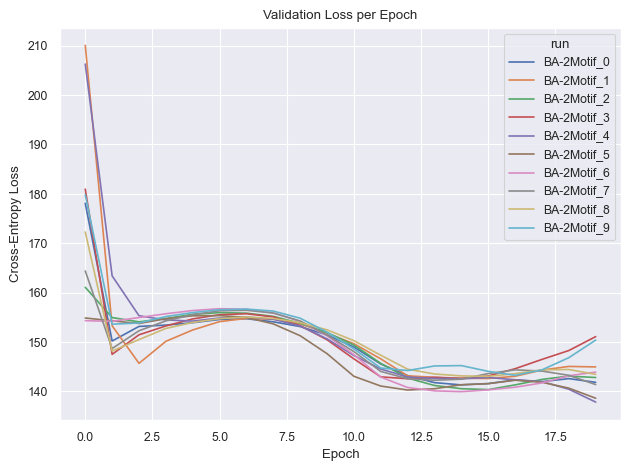

In [ ]:
sns.set_theme()
sns.set_context("paper")
sns.lineplot(data=combined_df, x="epoch", y="val_loss", hue="run")
plt.title("Validation Loss per Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.xlabel("Epoch")
plt.grid(True)

#plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
#plt.legend().remove()
plt.tight_layout()  # prevent clipping

plt.savefig("val_loss_plot.pdf", bbox_inches='tight')

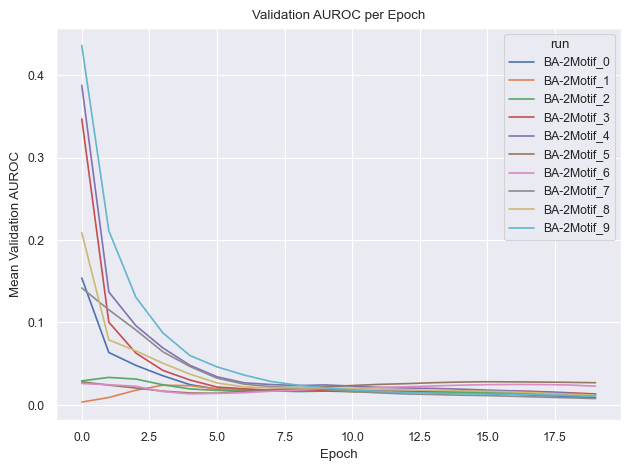

In [ ]:
sns.lineplot(data=combined_df, x="epoch", y="val_auroc", hue="run")
plt.title("Validation AUROC per Epoch")
plt.ylabel("Mean Validation AUROC")
plt.xlabel("Epoch")
plt.grid(True)

#plt.legend(loc='lower left')
#plt.legend().remove()
plt.tight_layout()  # prevent clipping

plt.savefig("val_auroc_plot.pdf", bbox_inches='tight')

In [ ]:
plt.savefig("val_loss_plot.pdf", bbox_inches='tight')

### Sweep config BA-Shapes

In [2]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [10]                  # 30 | 10 | 10     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 1.0 | 5.0     
            },
        'tT': {
            'values': [1.0, 2.0]            # 2.0 | 0.05 | 2.0     
            },
        'size_reg': {
            'values': [0.05]                # 0.05 | 0.05 | 0.05     
            },
        'entropy_reg': {
            'values': [0.1, 0.5]                # 1.0 | 1.0 | 1.0     
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.003]               # 0.003 | 0.003 | 0.003            
            },
        'sampled_graphs':{
            'values': [1, 5]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [1]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config Tree-Cycles

In [2]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [20]                  # 30 | 20 | 20     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 5.0 | 1.0     not annealing but increasing in rep
            },
        'tT': {
            'values': [1.0, 5.0]            # 2.0 | 5.0 | 5.0     
            },
        'size_reg': {
            'values': [0.0001, 0.1]                # 0.05 | 0.0001 | 0.1     TO BE CHECKED IN REP
            },
        'entropy_reg': {
            'values': [1.0]                # 1.0 | 0.01 | 10.0         TO BE CHECKED IN REP 
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.0003]       # 0.003 | 0.003 | 0.003            
            },
        'sampled_graphs':{
            'values': [1, 5, 10]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [1]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config Tree-Grid

In [5]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [30]                  # 30 | 30 | 30     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 5.0 | 5.0     
            },
        'tT': {
            'values': [2.0]            # 2.0 | 5.0 | 2.0     
            },
        'size_reg': {
            'values': [1.0, 0.5]                # 0.05 | 0.01 | 1.0     
            },
        'entropy_reg': {
            'values': [1.0]                # 1.0 | 1.0 | 1.0     
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.01]       # 0.003 | 0.01 | 0.003            
            },
        'sampled_graphs':{
            'values': [5]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [1]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config BA-Community

In [4]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [20]                  # 30 | 20 | 20     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [1.0]                 # 5.0 | 1.0 | 1.0     
            },
        'tT': {
            'values': [1.0, 5.0]                 # 2.0 | 1.0 | 1.0     
            },
        'size_reg': {
            'values': [0.1, 0.05]           # 0.05 | 0.05 | 0.05     
            },
        'entropy_reg': {
            'values': [1.0]            # 1.0 | 1.0 | 1.0     
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.003, 0.0003]       # 0.003 | 0.003 | 0.003            
            },
        'sampled_graphs':{
            'values': [5]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0, 0.5]                 # 0.0 | 0.5 | 0.5     
            },
        'batch_size':{
            'values': [1]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config BA-2Motif

In [2]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "minimize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [10, 20]              # 30 | 10 | 20     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 1.0 | 5.0     
            },
        'tT': {
            'values': [1.0]                 # 2.0 | - | 1.0     
            },
        'size_reg': {
            'values': [0.03]                # 0.05 | 0.00 | 0.03   0.0003  
            },
        'entropy_reg': {
            'values': [0.01, 0.1, 1.0]                # 1.0 | 0.000 | 0.01   0.3 
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.003, 0.005, 0.01]               # 0.003 | 0.003 | 0.005            
            },
        'sampled_graphs':{
            'values': [1, 5, 10]               # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [64]              # ---   
            },
        'num_training_instances':{
            'values': [30]              # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

### Sweep config MUTAG

In [2]:
sweep_config = {
    "method": 'grid',                    # random, grid or Bayesian search
    "metric": {"goal": "maximize", "name": "val/mean_ind_AUC"},
    "parameters": {
        'epochs': {                         # Paper | Code | Replication
            'values': [10, 20]                  # 30 | 10 | 30     
            },
        'paper_loss': {
            'values': [1]                   # ---  
            },
        't0': {
            'values': [5.0]                 # 5.0 | 5.0 | 5.0     
            },
        'tT': {
            'values': [1.0, 5.0]            # 2.0 | 5.0/1.0 | 5.0     
            },
        'size_reg': {
            'values': [0.005]                # 0.05 | 0.01/0.005 | 0.005     
            },
        'entropy_reg': {
            'values': [0.1, 1.0]                # 1.0 | 0.01/1.0 | 1.0     
            },
        'L2_reg': {
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'lr_mlp':{
            'values': [0.01, 0.003]       # 0.003 | 0.01 | 0.0003            
            },
        'sampled_graphs':{
            'values': [1, 5, 10]                  # ??? | 1 | 1     
            },
        'sample_bias':{
            'values': [0.0]                 # 0.0 | 0.0 | 0.0     
            },
        'batch_size':{
            'values': [64]              # ---   
            },
        'num_training_instances':{
            'values': [30]                  # 0 | 0 | 0     
            },
        'seed':{
            'values': [74, 75, 76]          # ---    
            },
    },
}   

In [ ]:
'L2_reg': {
            'values': [0.0, 0.01, 0.1, 1.0]
            },

In [6]:
sweep_id = wandb.sweep(sweep_config, project="SWEEP-Tree-Grid-FIXED-NUM-TRAINING-HIGHLR")

Create sweep with ID: izyhss40
Sweep URL: https://wandb.ai/tristan-schulz2001-tu-dortmund/SWEEP-Tree-Grid-FIXED-NUM-TRAINING-HIGHLR/sweeps/izyhss40


In [63]:
dataset="Tree-Cycles"

In [ ]:
data, labels = datasetLoader.loadOriginalNodeDataset("BA-Community")
single_label = data.y
motifNodes = [i for i in range(511,800,1)]
#[400,700,5]
#[511,871,6]
#motifNodes = [i for i in range(single_label.shape[0]) if single_label[i] != 0 and single_label[i] != 4]
print(len(motifNodes))
print(len(motifNodes)*0.46)
print(len(motifNodes)*0.08)

middleCommunityNodes = [i for i in range(single_label.shape[0]) if single_label[i] == 1 or single_label[i] == 5]
# Since middle nodes are next to each other, select every second node
motifNodes = [_ for i,_ in enumerate(middleCommunityNodes) if i%2 == 0]
print(len(motifNodes))
#27 + 27 + 4

32
14.72
2.56
160


In [7]:
wandb.agent(sweep_id, sweepExplainerTreeGrid.trainExplainer)

wandb: Agent Starting Run: fasd6mkr with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 74
wandb: 	size_reg: 1
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:-0.00016792185488156974, 0.043154239654541016
Epoch 1, Loss: 0.8455331325531006
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.6313764996794579
roc_auc_score: 0.6313764996794579
Mean individual BinaryAUROC: 0.46066564321517944
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not com

wandb: Agent Starting Run: n90uygge with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 74
wandb: 	size_reg: 0.5
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:-0.00016792185488156974, 0.043154239654541016
Epoch 1, Loss: 0.6561118364334106
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.700018316695668
roc_auc_score: 0.700018316695668
Mean individual BinaryAUROC: 0.7154771089553833
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not comput

wandb: Agent Starting Run: 8vx5chsz with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 75
wandb: 	size_reg: 1
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:0.00023751975095365196, 0.043194420635700226
Epoch 1, Loss: 0.8650895357131958
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.3702720029306713
roc_auc_score: 0.37027200293067136
Mean individual BinaryAUROC: 0.17775163054466248
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not com

wandb: Agent Starting Run: 2gt671tk with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 75
wandb: 	size_reg: 0.5
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:0.00023751975095365196, 0.043194420635700226
Epoch 1, Loss: 0.6661179661750793
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.33047898159172084
roc_auc_score: 0.33047898159172084
Mean individual BinaryAUROC: 0.370402067899704
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not comp

wandb: Agent Starting Run: b6apvb1w with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 76
wandb: 	size_reg: 1
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:0.0006549620302394032, 0.042804840952157974
Epoch 1, Loss: 0.8772948980331421
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.726531733675245
roc_auc_score: 0.726531733675245
Mean individual BinaryAUROC: 0.5879403352737427
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computab

wandb: Agent Starting Run: x04kaf0m with config:
wandb: 	L2_reg: 0
wandb: 	batch_size: 1
wandb: 	entropy_reg: 1
wandb: 	epochs: 30
wandb: 	lr_mlp: 0.01
wandb: 	num_training_instances: 30
wandb: 	paper_loss: 1
wandb: 	sample_bias: 0
wandb: 	sampled_graphs: 5
wandb: 	seed: 76
wandb: 	size_reg: 0.5
wandb: 	t0: 5
wandb: 	tT: 2


MLP weights initialized:0.0006549620302394032, 0.042804840952157974
Epoch 1, Loss: 0.6792438626289368
---------------- TRAIN AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
BinaryAUROC: 0.6750618188478799
roc_auc_score: 0.6750618188478799
Mean individual BinaryAUROC: 0.6032631397247314
---------------- VAL AUC ----------------
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not computable
AUC not comput

wandb: Sweep Agent: Waiting for job.
wandb: Sweep Agent: Exiting.


In [3]:
# TODO: Probably best to load data here once and pass to each task?
importlib.reload(evaluation)

# Seed 74 and 75 achieve results 0/1
for i in range(74, 77):
    mlp, downstreamTask, testAUC, individual_aurocs_test, testInfTime = trainExplainer_trainSplit.trainExplainer(dataset=dataset, save_model=False, wandb_project="MUTAG-74-75-76-DEBUG-LOOP", runSeed=i)

"""MLP weights initialized:0.0003243635583203286, 0.09082738310098648
MLP weights initialized:0.0005468199960887432, 0.09090176224708557
MLP weights initialized:-4.145771981711732e-06, 0.09077146649360657             (THIS ACHIEVES WANTED ACC)"""

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: tristan-schulz2001 (tristan-schulz2001-tu-dortmund) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


MLP weights initialized:0.0012494741240516305, 0.09379079937934875
pOriginal 0 tensor([[9.4721e-01, 5.2794e-02],
        [8.7422e-01, 1.2578e-01],
        [9.9746e-01, 2.5373e-03],
        [7.3376e-01, 2.6624e-01],
        [5.4744e-01, 4.5256e-01],
        [7.5364e-01, 2.4636e-01],
        [7.3477e-01, 2.6523e-01],
        [9.9981e-01, 1.8716e-04],
        [9.9076e-01, 9.2384e-03],
        [6.5712e-01, 3.4288e-01],
        [8.6674e-01, 1.3326e-01],
        [9.6719e-01, 3.2806e-02],
        [9.7681e-01, 2.3195e-02],
        [8.1450e-01, 1.8550e-01],
        [9.7602e-01, 2.3978e-02],
        [3.5580e-01, 6.4420e-01],
        [8.1421e-01, 1.8579e-01],
        [7.4068e-01, 2.5932e-01],
        [9.6913e-01, 3.0872e-02],
        [2.1587e-01, 7.8413e-01],
        [9.0113e-01, 9.8870e-02],
        [6.0973e-01, 3.9027e-01],
        [9.5446e-01, 4.5537e-02],
        [7.9485e-01, 2.0515e-01],
        [9.8748e-01, 1.2522e-02],
        [8.9842e-01, 1.0158e-01],
        [7.0332e-01, 2.9668e-01],
   

MLP weights initialized:0.0029194343369454145, 0.09265193343162537
pOriginal 0 tensor([[8.7358e-01, 1.2642e-01],
        [7.9485e-01, 2.0515e-01],
        [6.0973e-01, 3.9027e-01],
        [9.7681e-01, 2.3195e-02],
        [9.9746e-01, 2.5373e-03],
        [9.9981e-01, 1.8716e-04],
        [9.6913e-01, 3.0872e-02],
        [6.5712e-01, 3.4288e-01],
        [7.9254e-01, 2.0746e-01],
        [8.7422e-01, 1.2578e-01],
        [5.4744e-01, 4.5256e-01],
        [9.4721e-01, 5.2794e-02],
        [8.1421e-01, 1.8579e-01],
        [9.7602e-01, 2.3978e-02],
        [7.9503e-01, 2.0497e-01],
        [8.6674e-01, 1.3326e-01],
        [3.5580e-01, 6.4420e-01],
        [9.6719e-01, 3.2806e-02],
        [7.3477e-01, 2.6523e-01],
        [8.1450e-01, 1.8550e-01],
        [9.9076e-01, 9.2384e-03],
        [2.1587e-01, 7.8413e-01],
        [7.3376e-01, 2.6624e-01],
        [8.9842e-01, 1.0158e-01],
        [9.5446e-01, 4.5537e-02],
        [7.0332e-01, 2.9668e-01],
        [7.4068e-01, 2.5932e-01],
   

MLP weights initialized:0.002111024921759963, 0.09085560590028763
pOriginal 0 tensor([[9.5446e-01, 4.5537e-02],
        [9.6913e-01, 3.0872e-02],
        [6.0973e-01, 3.9027e-01],
        [2.1587e-01, 7.8413e-01],
        [9.7681e-01, 2.3195e-02],
        [7.3376e-01, 2.6624e-01],
        [7.0332e-01, 2.9668e-01],
        [7.5364e-01, 2.4636e-01],
        [5.4744e-01, 4.5256e-01],
        [8.6674e-01, 1.3326e-01],
        [7.3477e-01, 2.6523e-01],
        [8.1450e-01, 1.8550e-01],
        [9.9746e-01, 2.5373e-03],
        [8.7422e-01, 1.2578e-01],
        [8.9842e-01, 1.0158e-01],
        [3.5580e-01, 6.4420e-01],
        [6.5712e-01, 3.4288e-01],
        [7.9485e-01, 2.0515e-01],
        [9.6719e-01, 3.2806e-02],
        [9.9076e-01, 9.2384e-03],
        [9.4721e-01, 5.2794e-02],
        [8.7358e-01, 1.2642e-01],
        [7.4068e-01, 2.5932e-01],
        [7.9503e-01, 2.0497e-01],
        [9.9981e-01, 1.8716e-04],
        [9.8748e-01, 1.2522e-02],
        [9.7602e-01, 2.3978e-02],
    

'MLP weights initialized:0.0003243635583203286, 0.09082738310098648\nMLP weights initialized:0.0005468199960887432, 0.09090176224708557\nMLP weights initialized:-4.145771981711732e-06, 0.09077146649360657             (THIS ACHIEVES WANTED ACC)'

In [3]:
for i in range(1):
    mlp, downstreamTask, testAUC, individual_aurocs_test, testInfTime = trainExplainer_trainSplit.trainExplainer(dataset=dataset, save_model=False, wandb_project="BA-Shapes-vis", runSeed=i)

wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: tristan-schulz2001 (tristan-schulz2001-tu-dortmund) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


MLP weights initialized:0.0007509115384891629, 0.0430612675845623
tensor(42609)
Epoch 1, Loss: 0.9130017757415771
---------------- TRAIN AUC ----------------
BinaryAUROC: 0.9965095887894441
roc_auc_score: 0.9965095887894441
Mean individual BinaryAUROC: 0.9939048290252686
---------------- VAL AUC ----------------
BinaryAUROC: 0.9961764256636052
roc_auc_score: 0.9961764256636052
Mean individual BinaryAUROC: 0.9940181970596313
tensor(42343)
Epoch 2, Loss: 0.7013751864433289
---------------- TRAIN AUC ----------------
BinaryAUROC: 0.9947418885898982
roc_auc_score: 0.9947418885898983
Mean individual BinaryAUROC: 0.9908832907676697
---------------- VAL AUC ----------------
BinaryAUROC: 0.9937972758485579
roc_auc_score: 0.993797275848558
Mean individual BinaryAUROC: 0.9912793636322021
tensor(41928)
Epoch 3, Loss: 0.539095938205719
---------------- TRAIN AUC ----------------
BinaryAUROC: 0.9944011892142169
roc_auc_score: 0.994401189214217
Mean individual BinaryAUROC: 0.9902238845825195
-------

In [14]:
torch.save(mlp.state_dict(), f"models/explainer-BA-Community")

In [64]:
mlp, downstreamTask = trainExplainer.loadExplainer(dataset=dataset)

MLP weights initialized:0.00033371857716701925, 0.043210893869400024


BinaryAUROC: 0.046902601694406056
roc_auc_score: 0.04690260169440607
Mean individual BinaryAUROC: 0.04005651921033859
-----------------Original Computational Graph-----------------


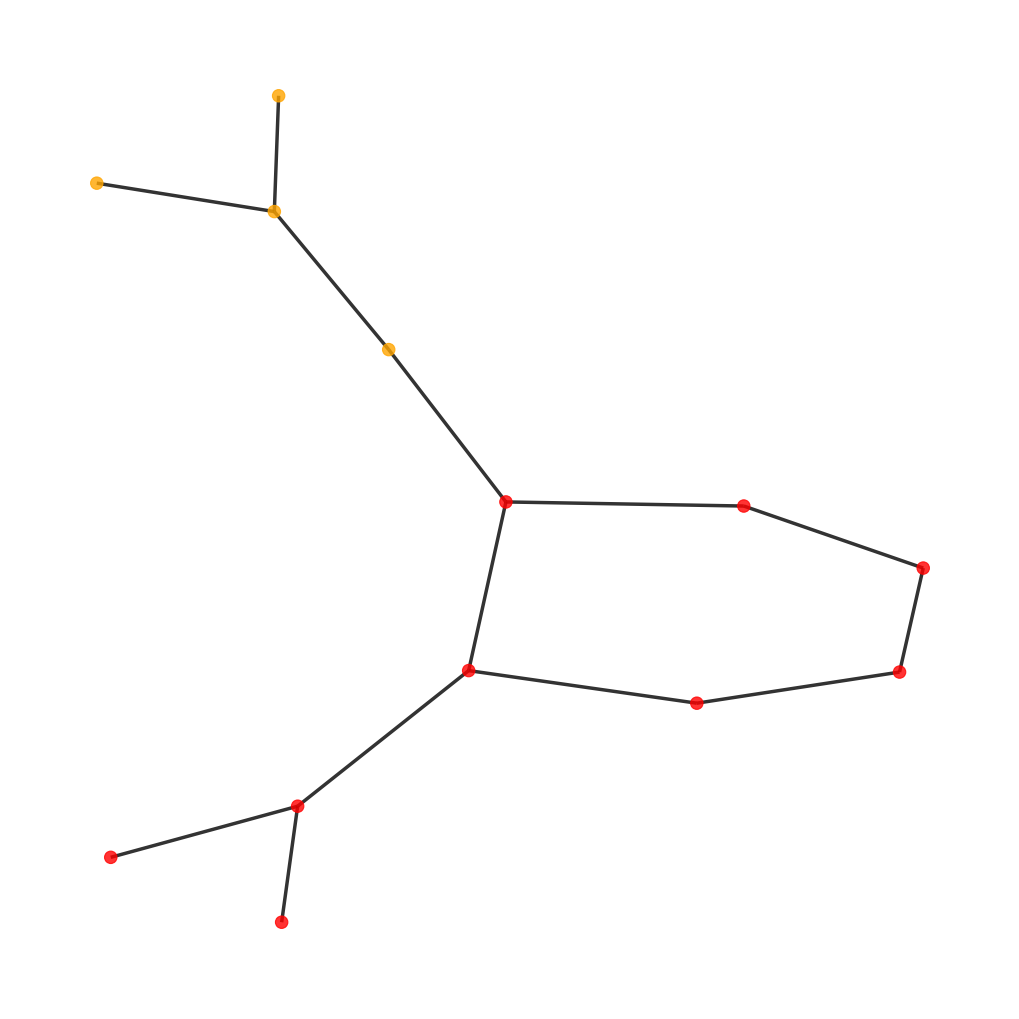

-----------Original Computational Graph with calculated Weights -----------


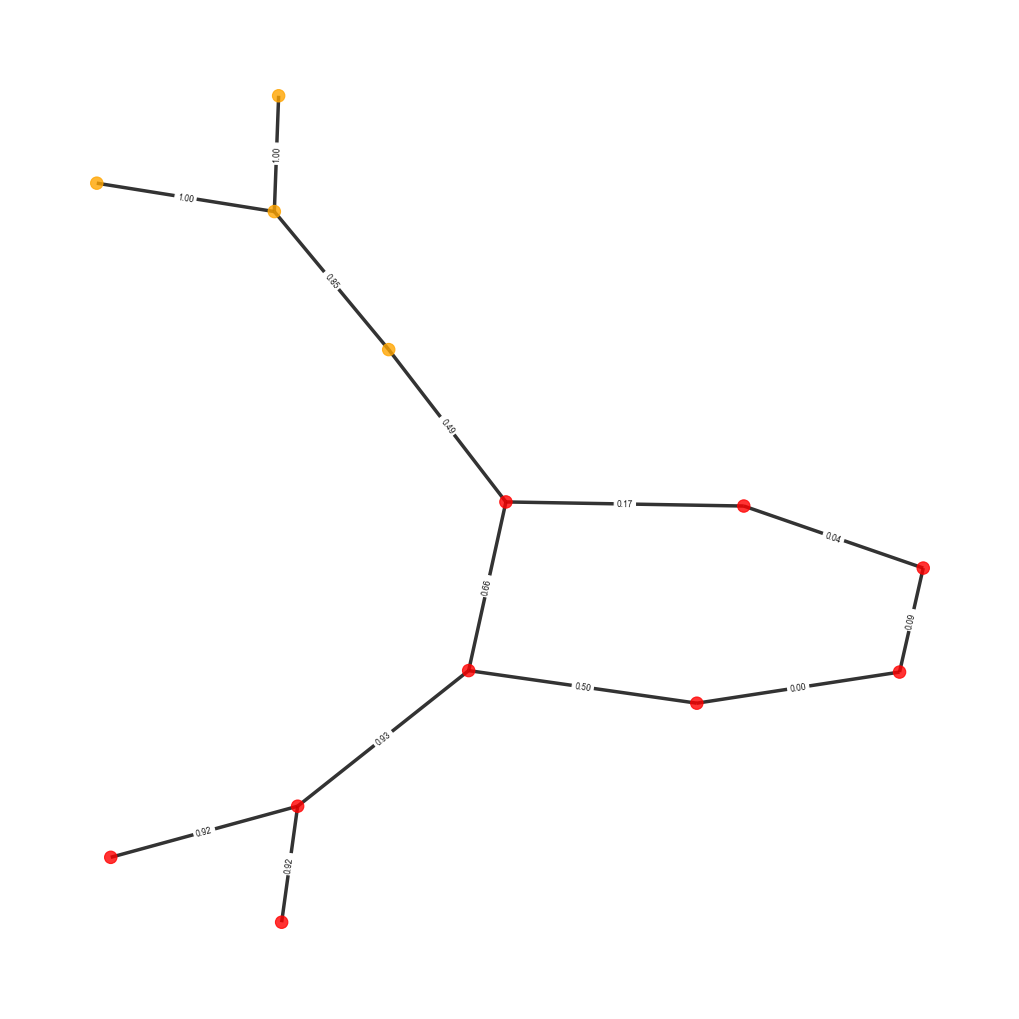

-----------------Top K Motif Graph-----------------


UnboundLocalError: cannot access local variable 'save_path' where it is not associated with a value

In [65]:
importlib.reload(evaluation)

auc, ind_aucs, infTime = evaluation.evaluate(datasetName=dataset, mlp=mlp, downstreamTask=downstreamTask)

print(f"Mean AUC for evaluation: {auc}")

MLP weights initialized:-0.003956333734095097, 0.13977564871311188
BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


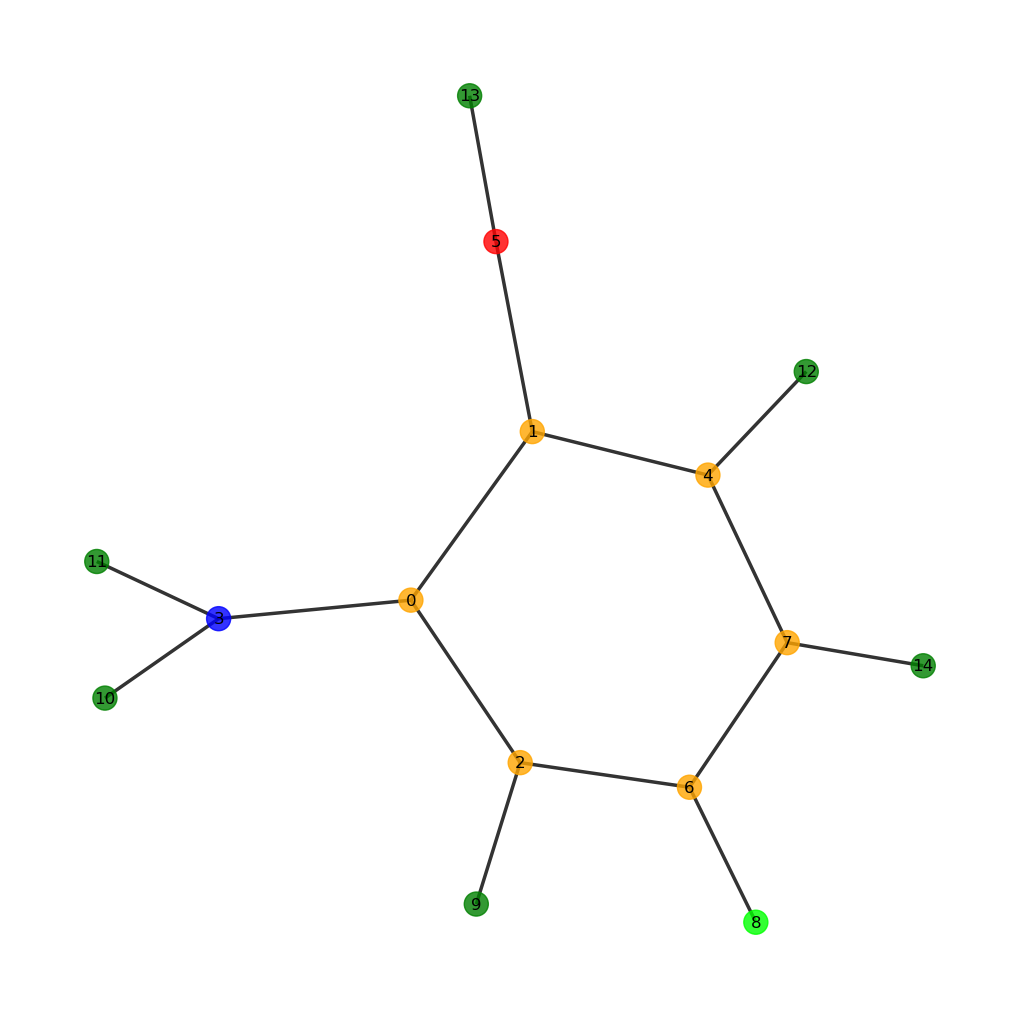

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


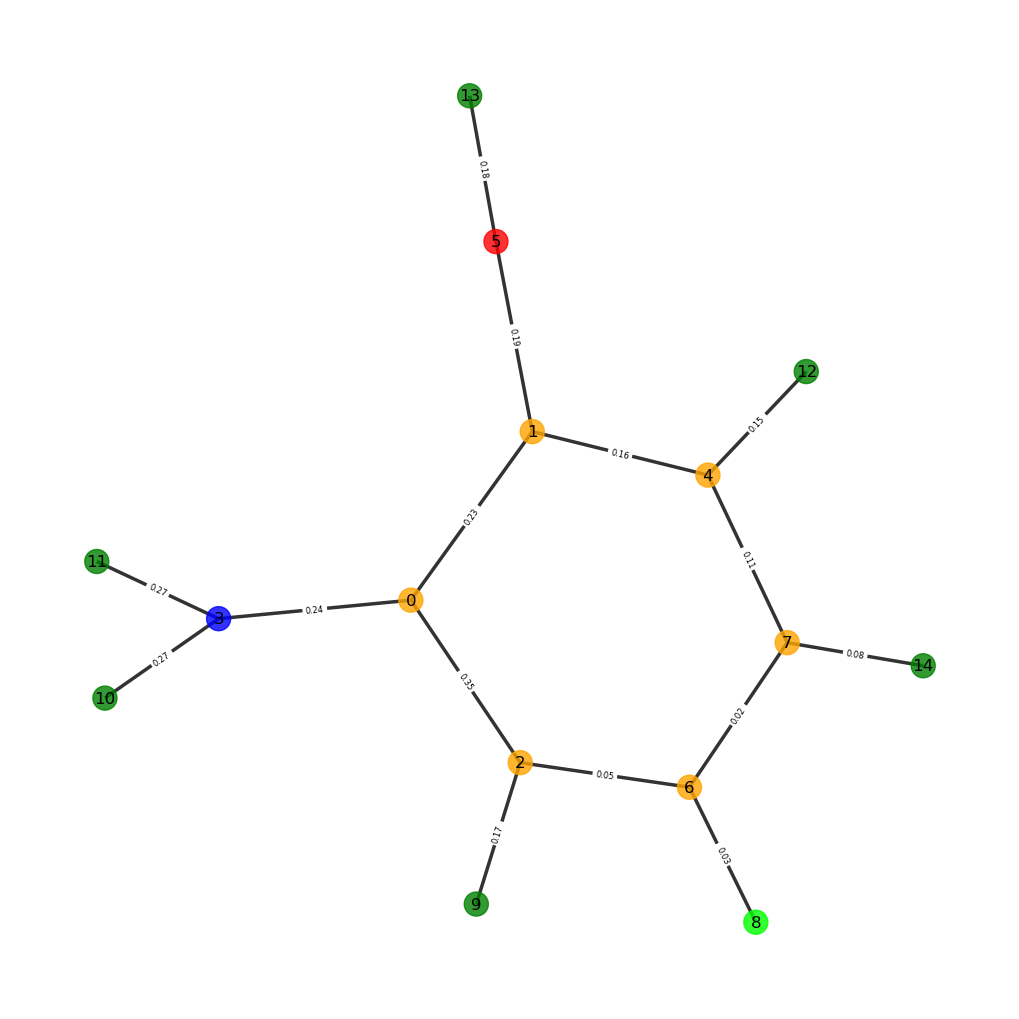

-----------------Ground truth Graph-----------------


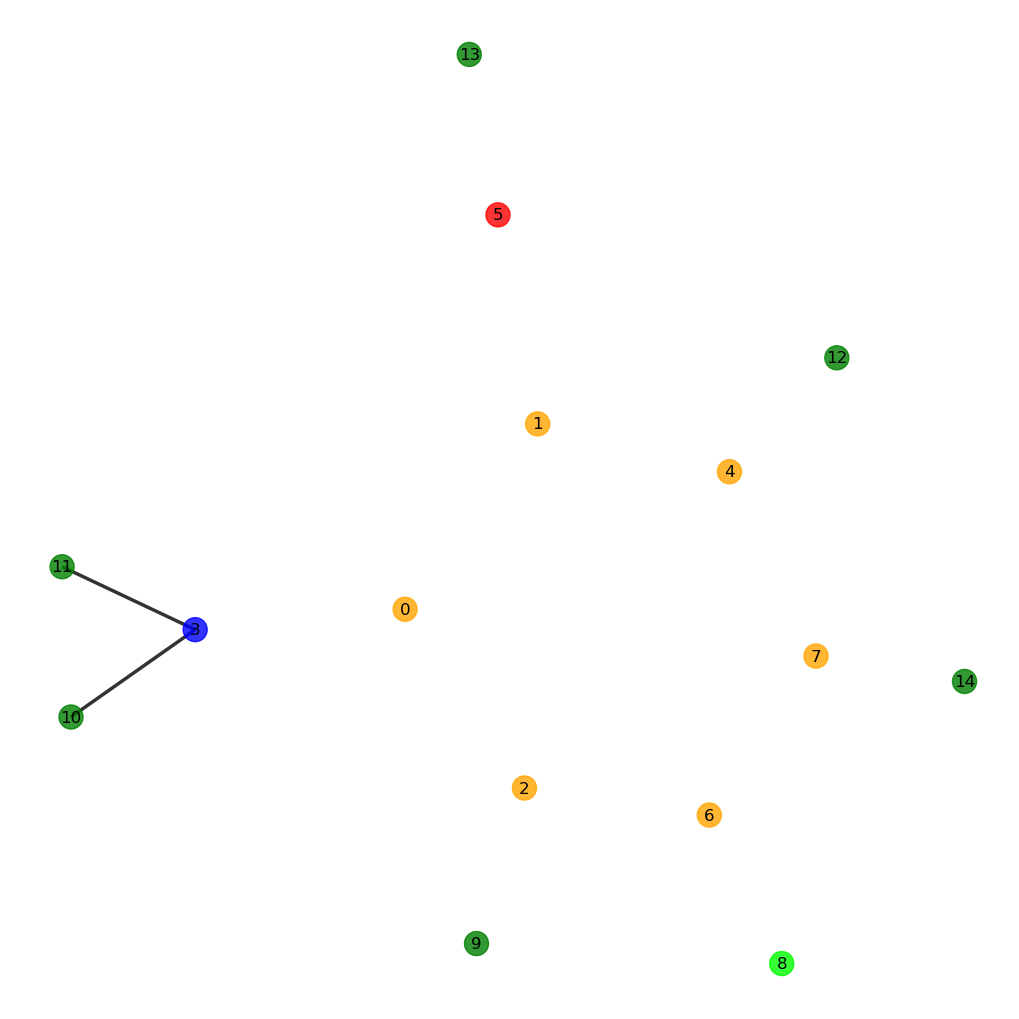

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


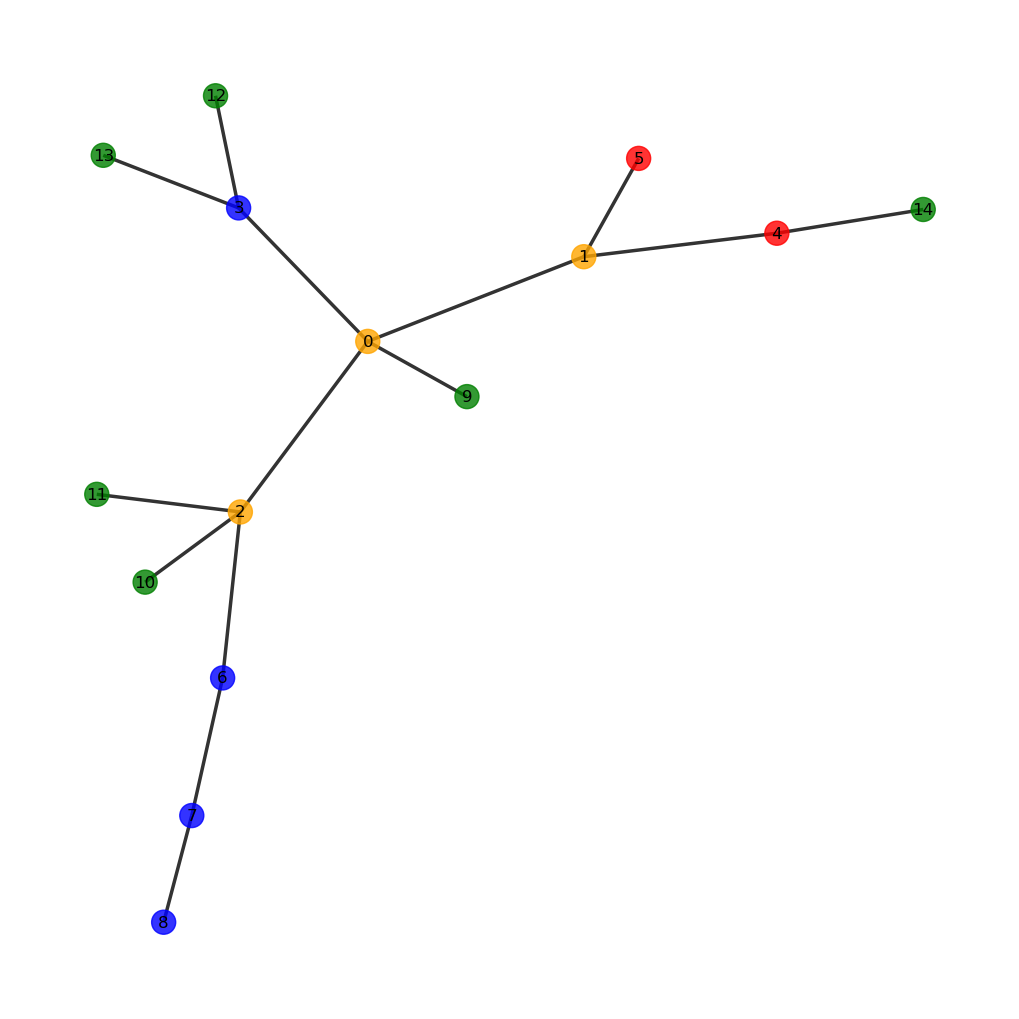

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


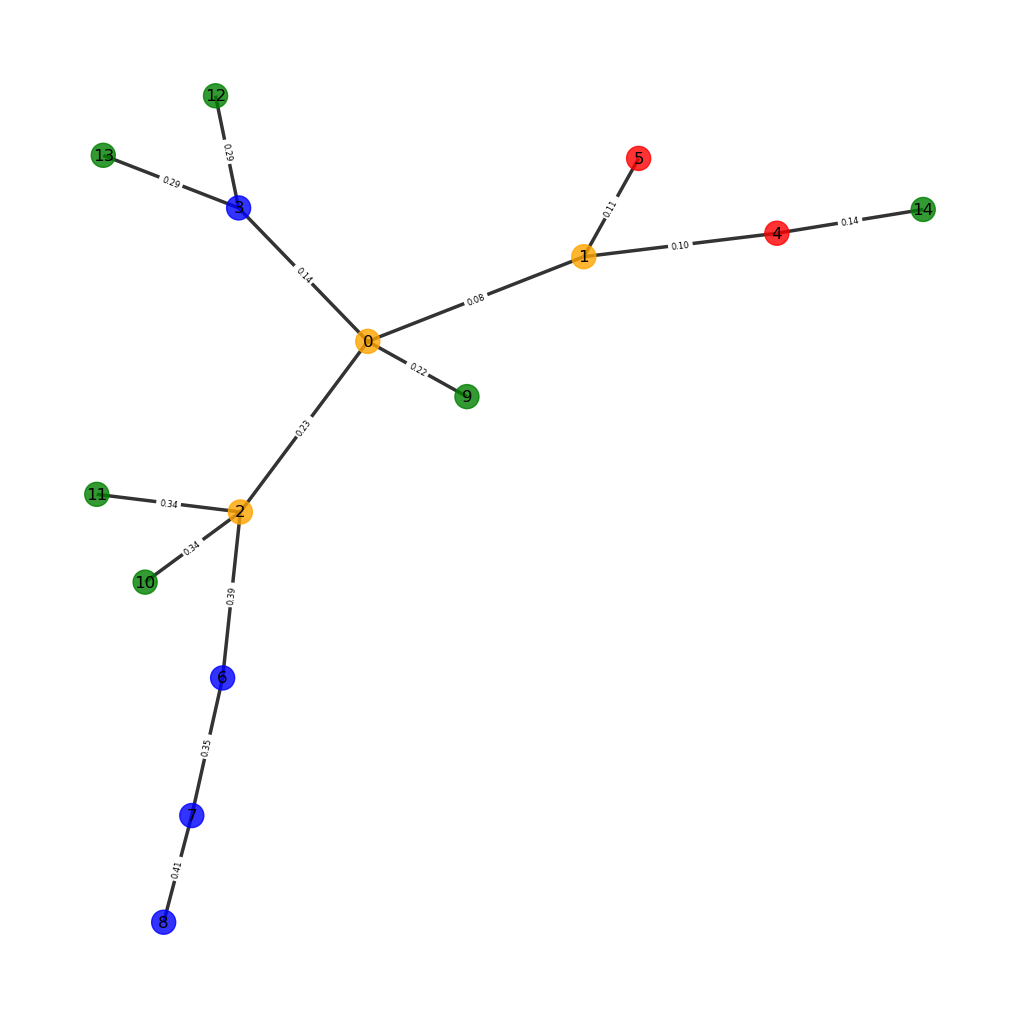

-----------------Ground truth Graph-----------------


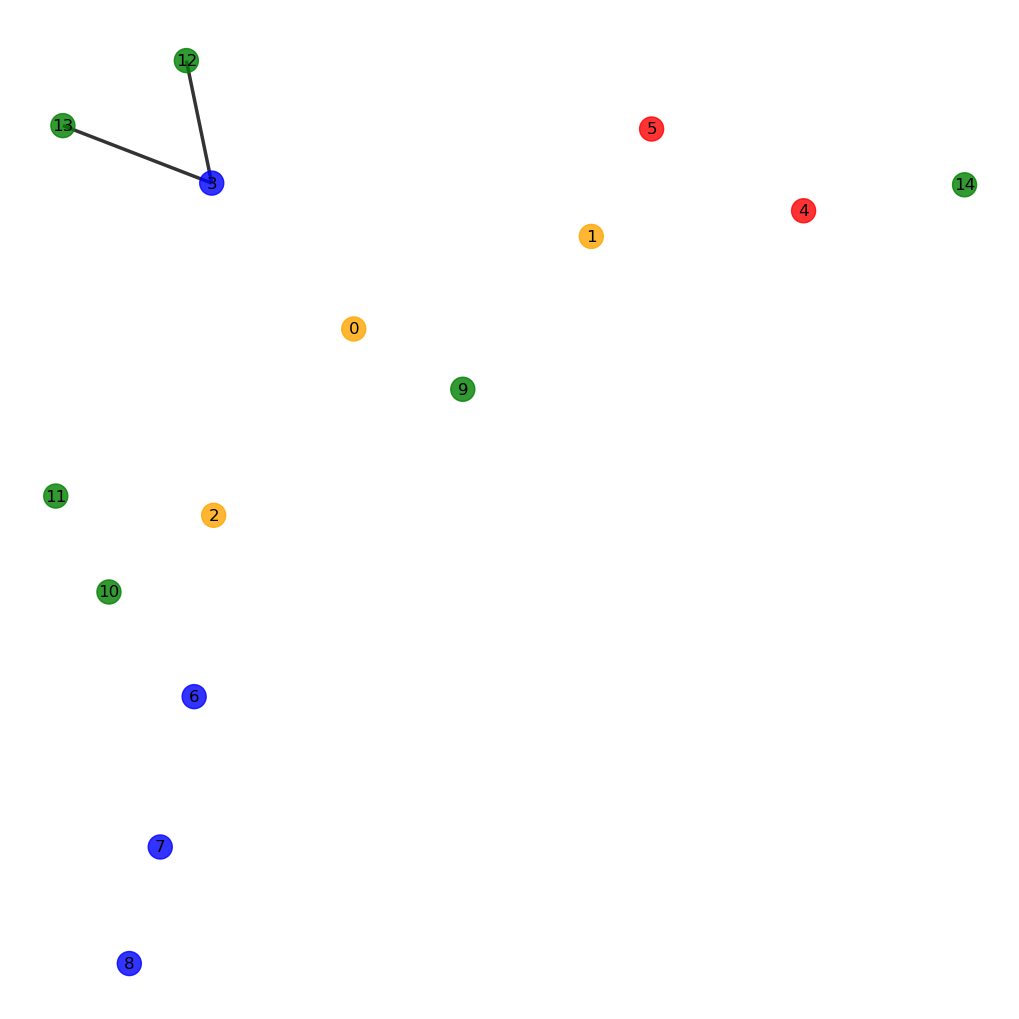

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


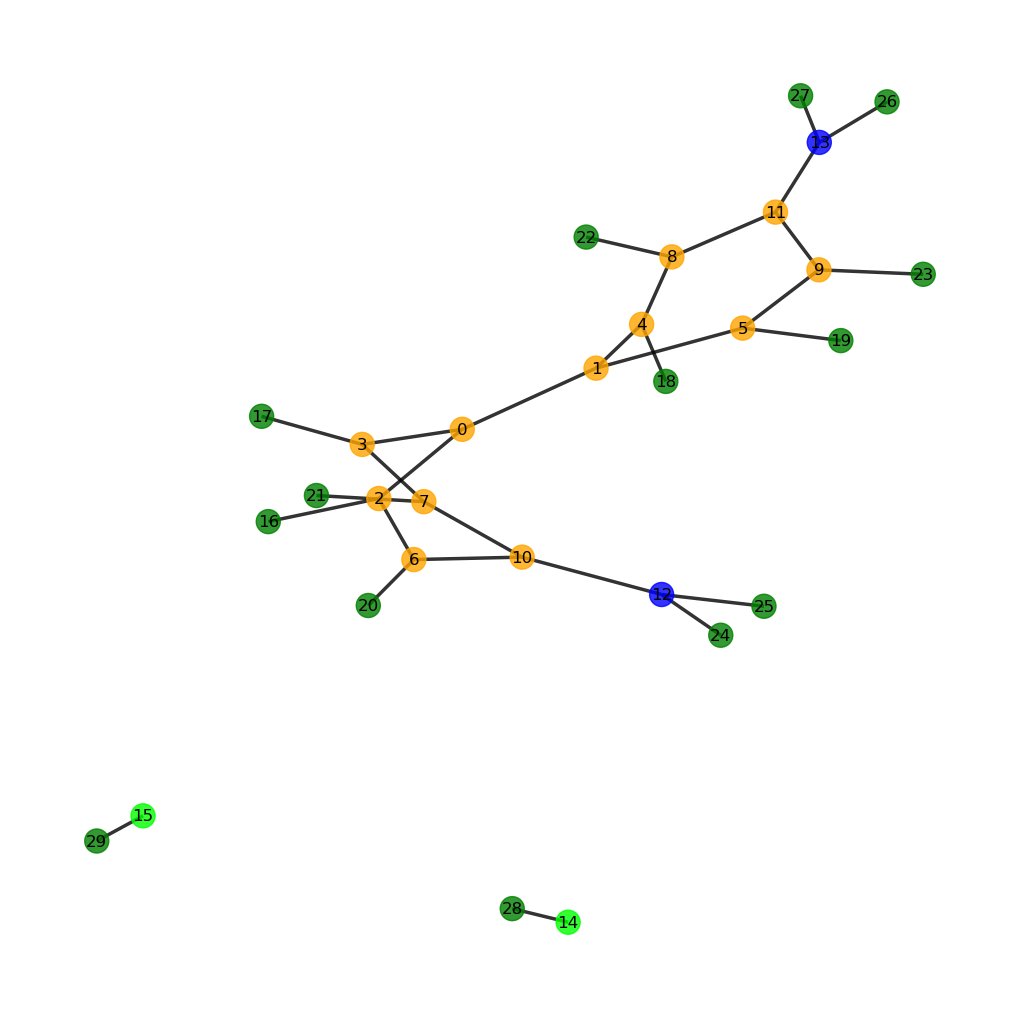

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


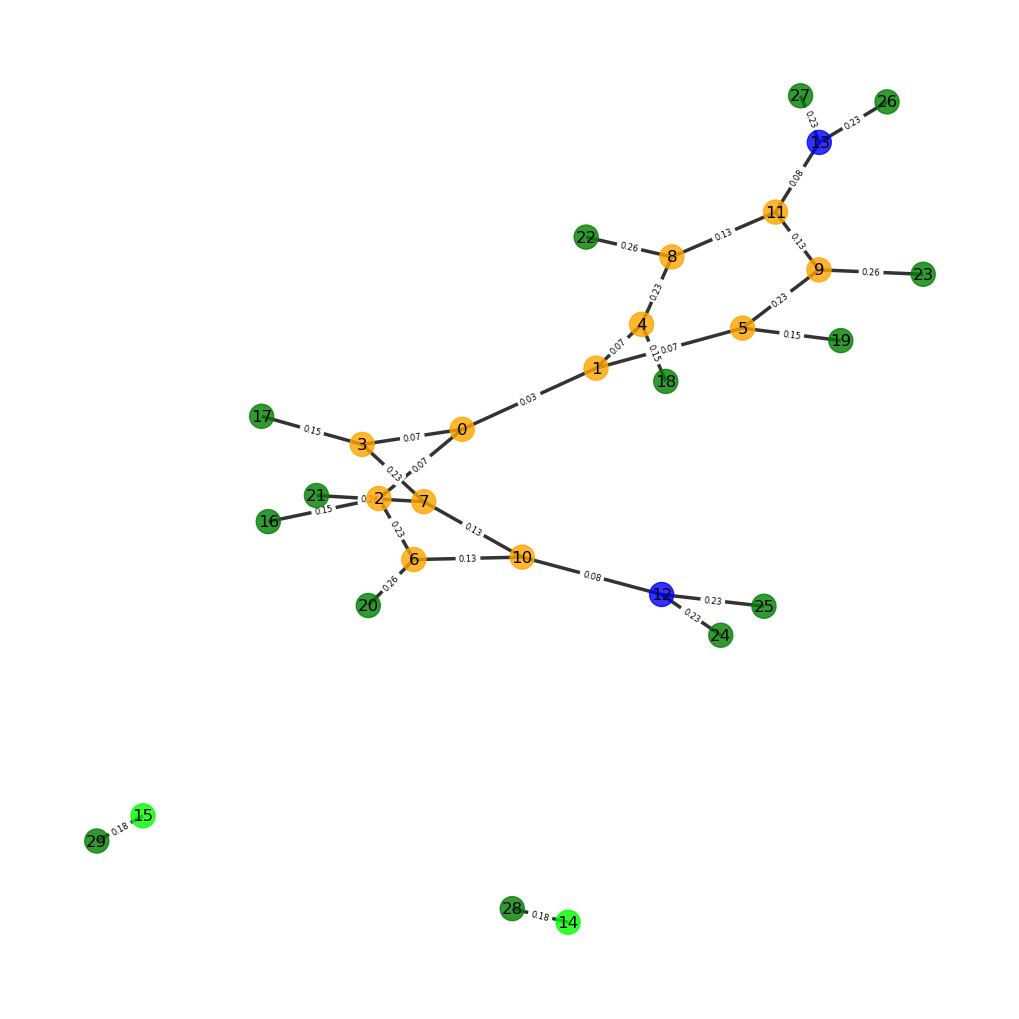

-----------------Ground truth Graph-----------------


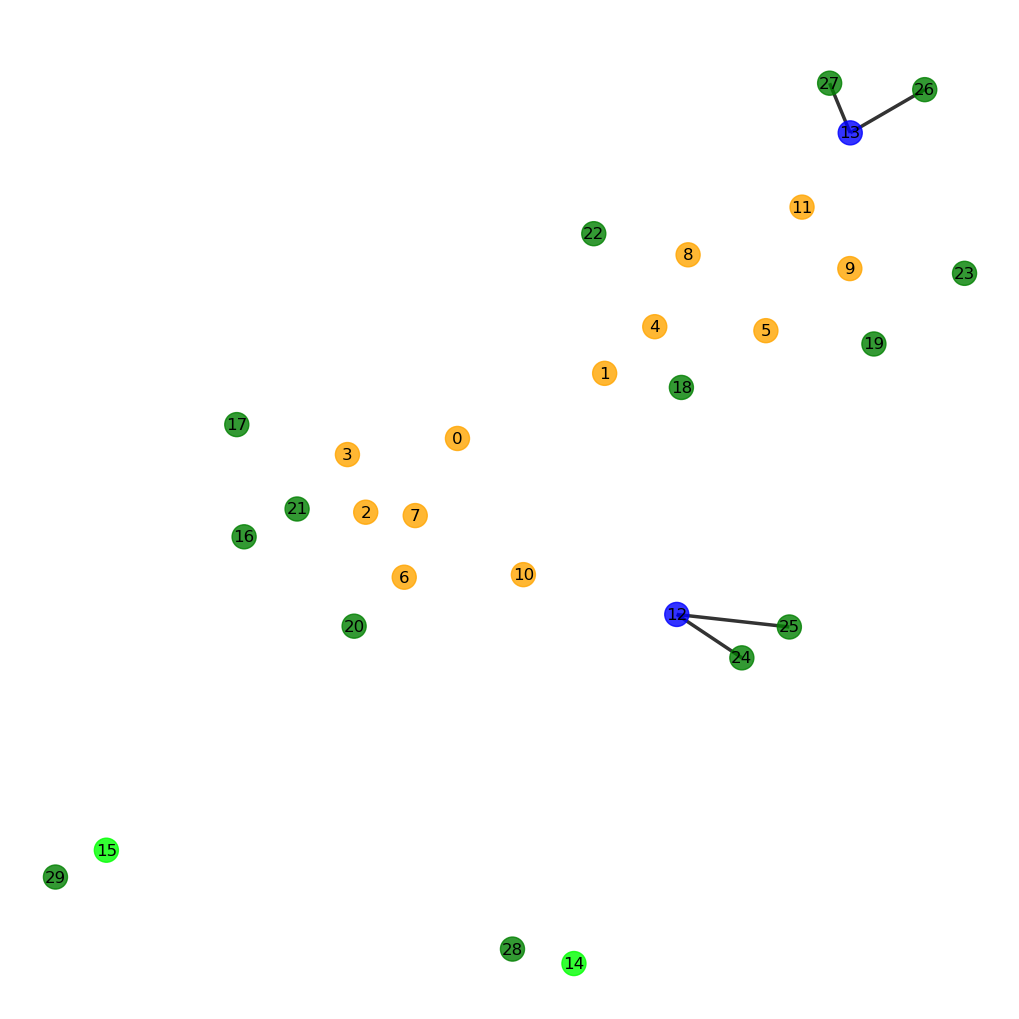

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


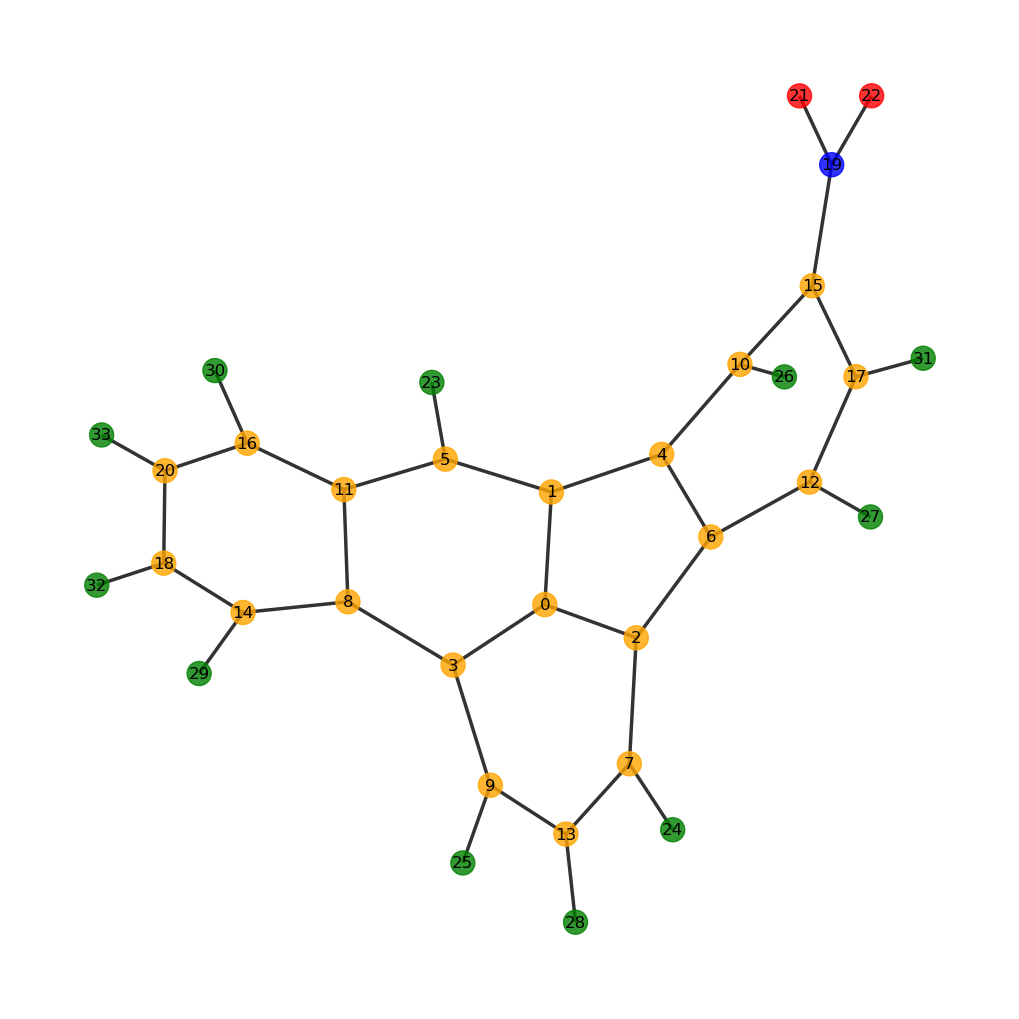

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


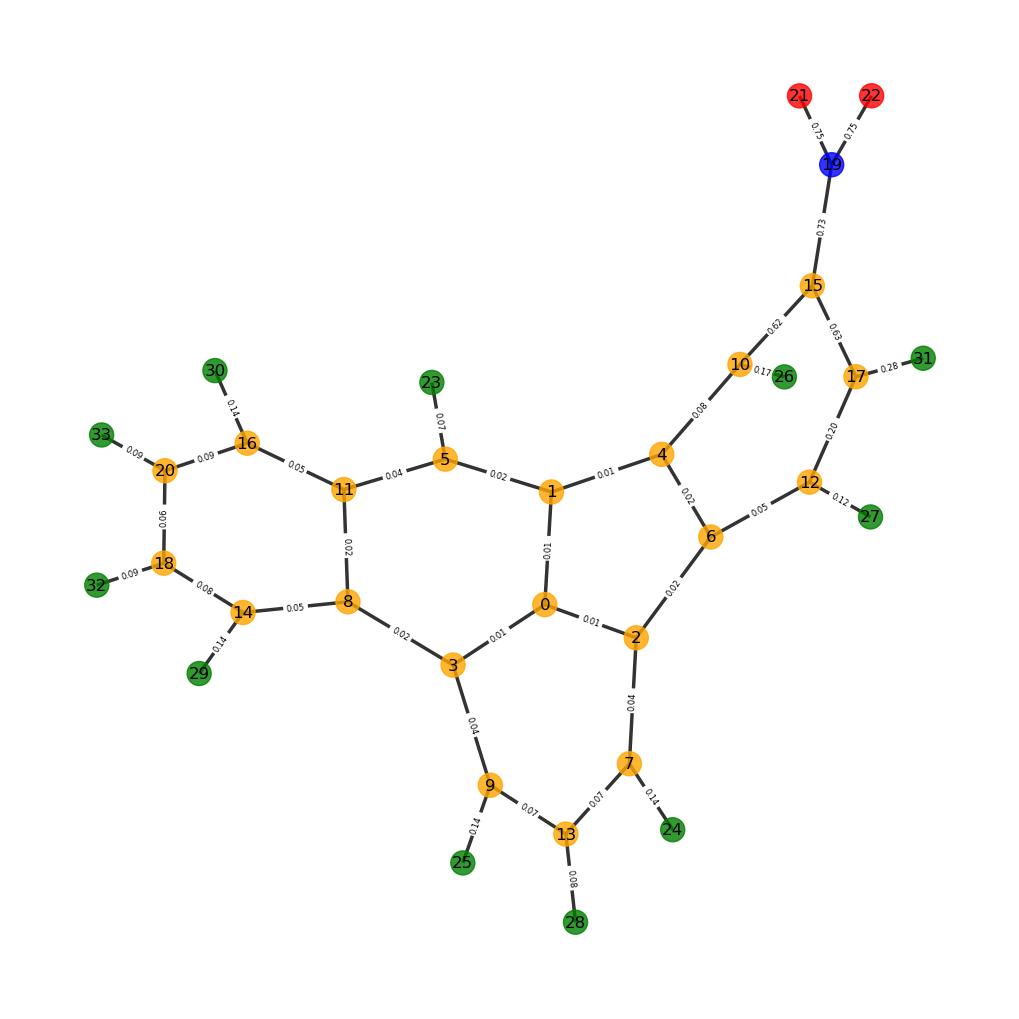

-----------------Ground truth Graph-----------------


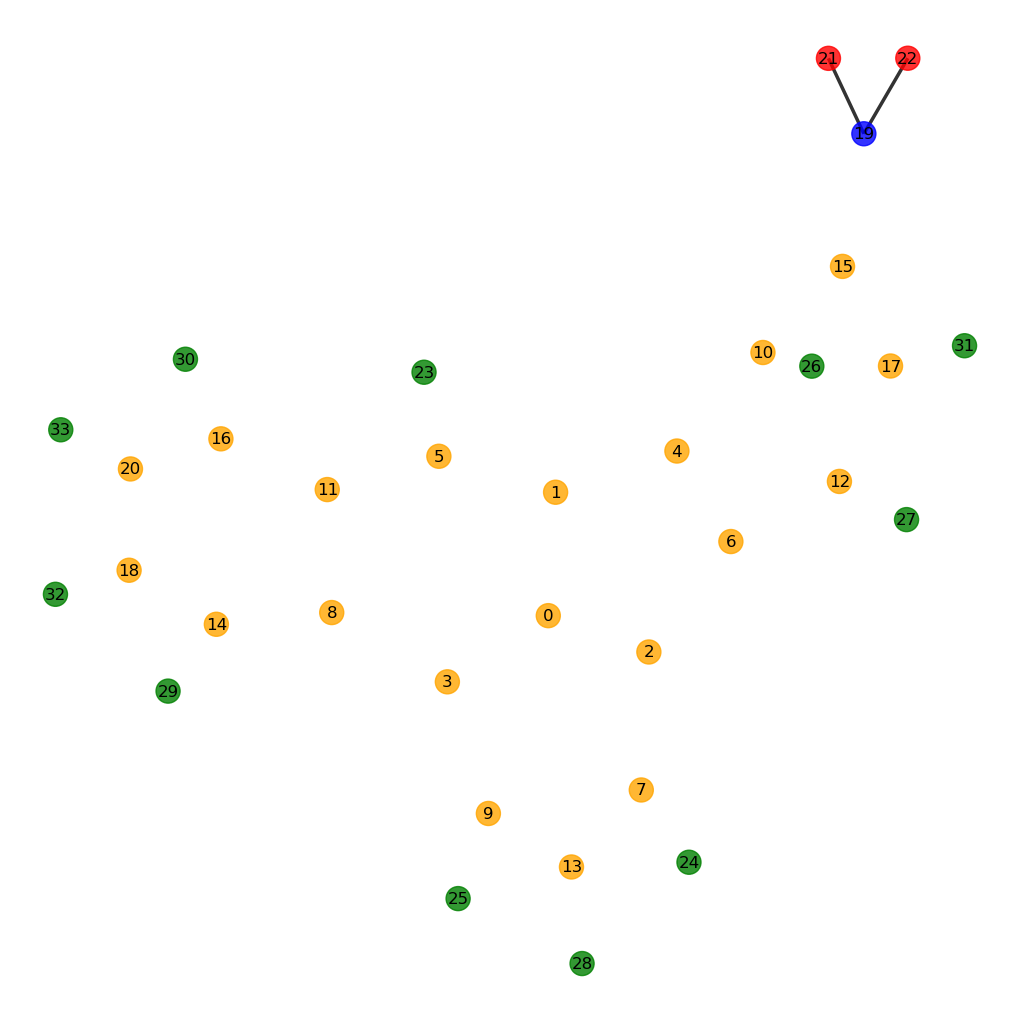

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


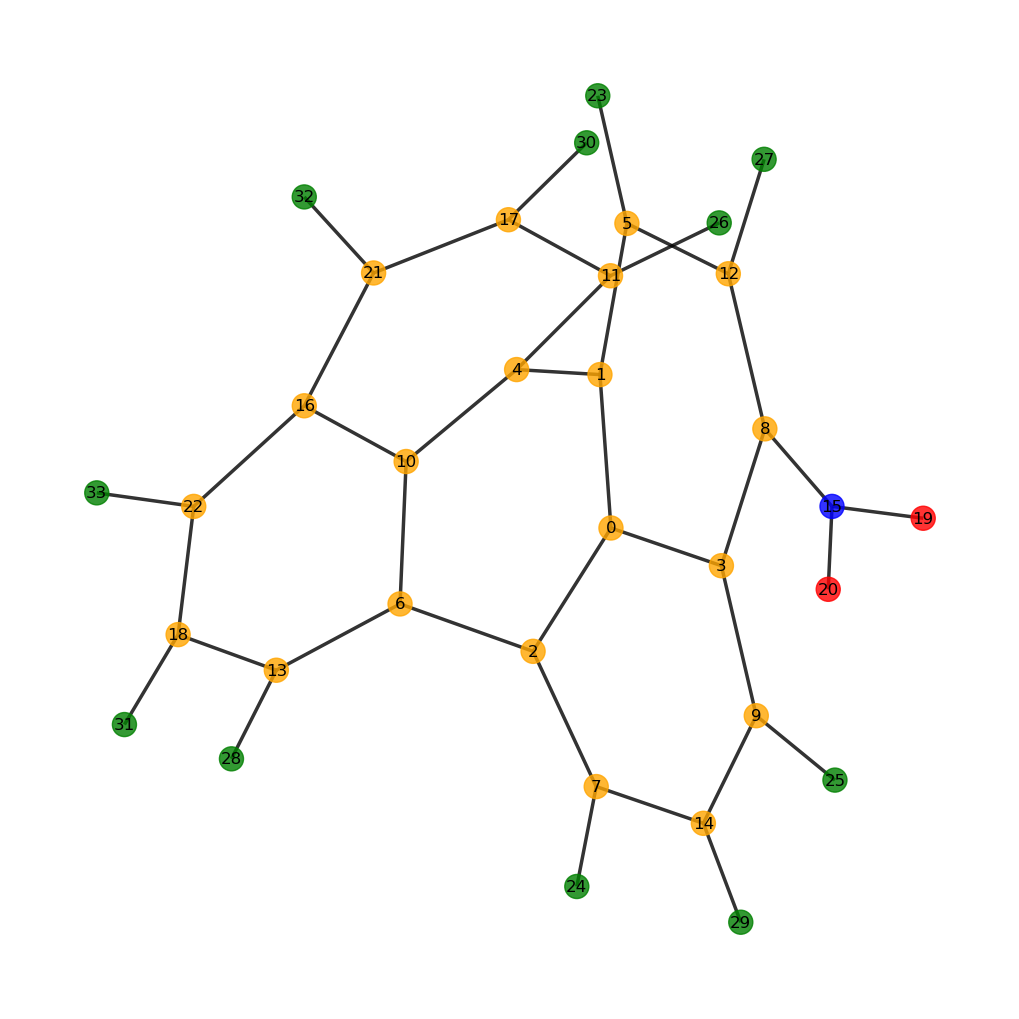

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


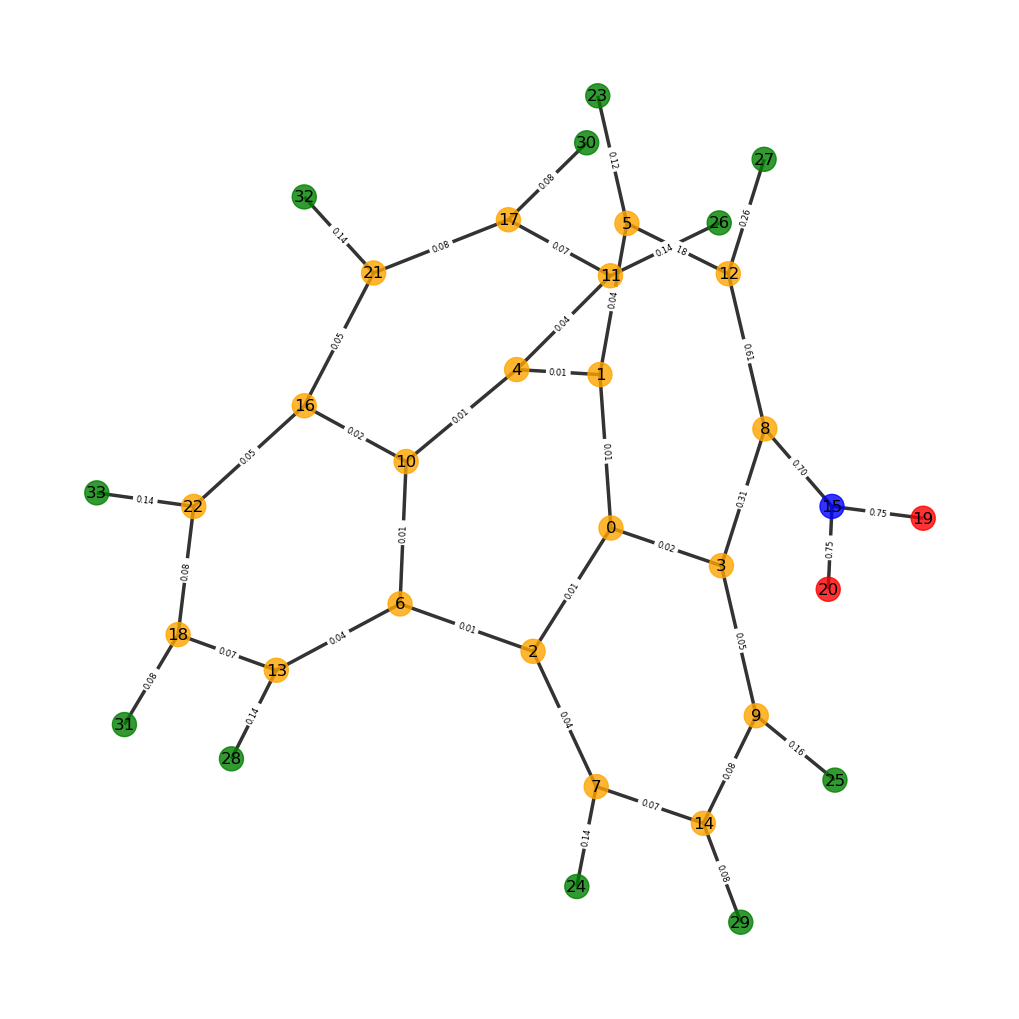

-----------------Ground truth Graph-----------------


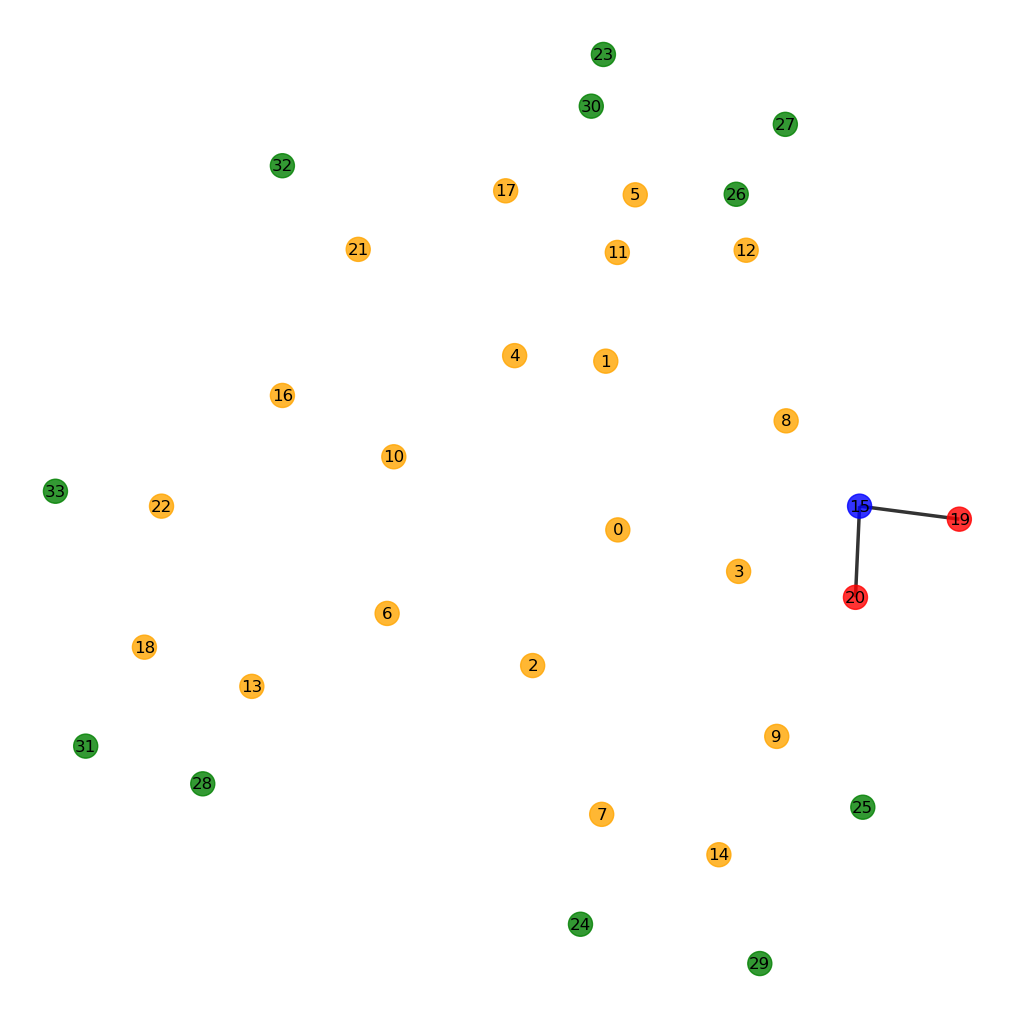

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


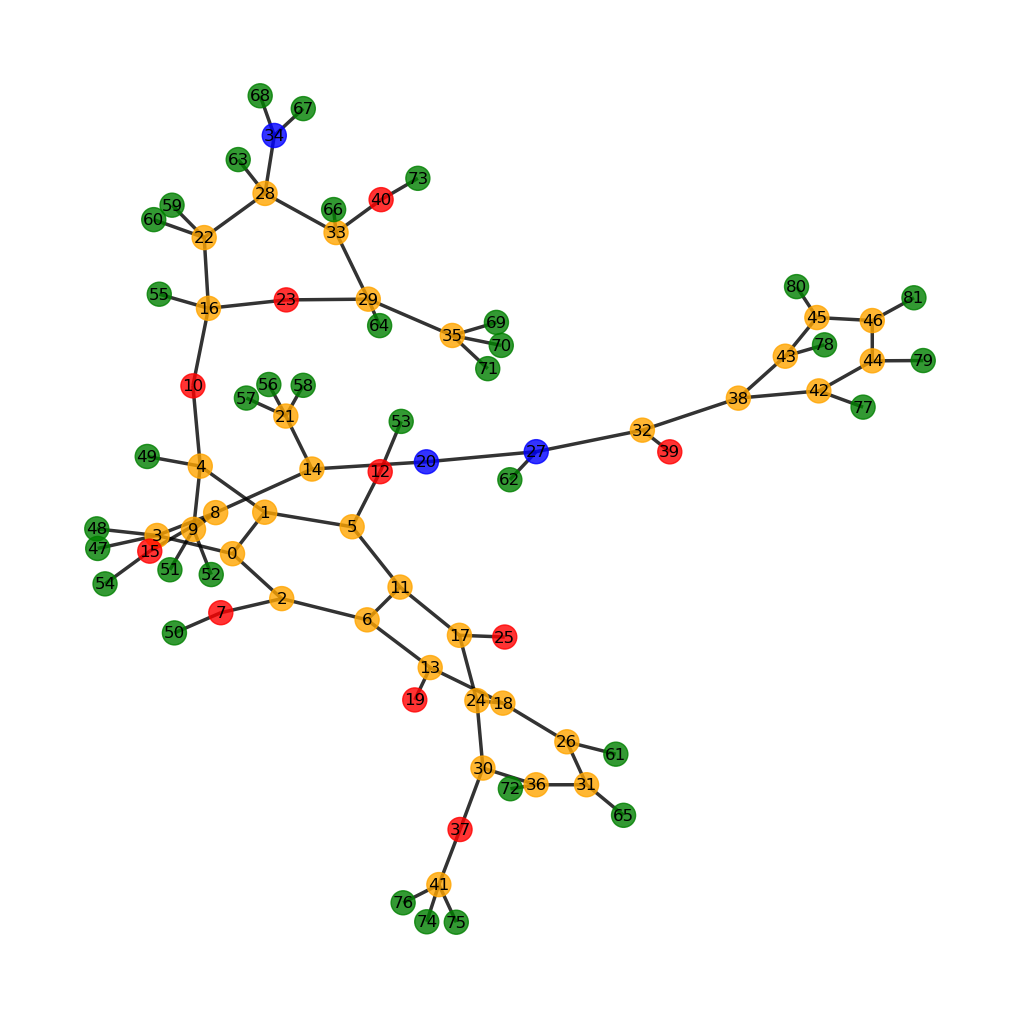

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


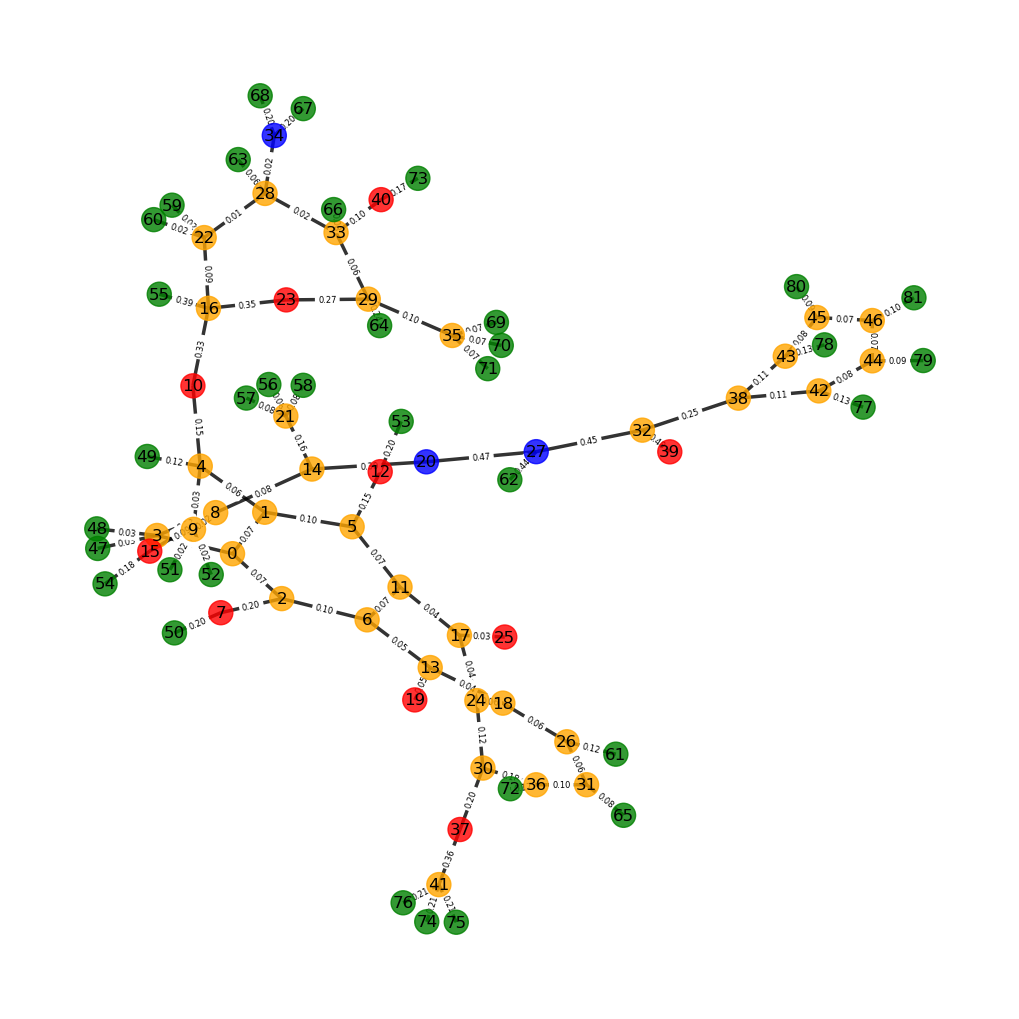

-----------------Ground truth Graph-----------------


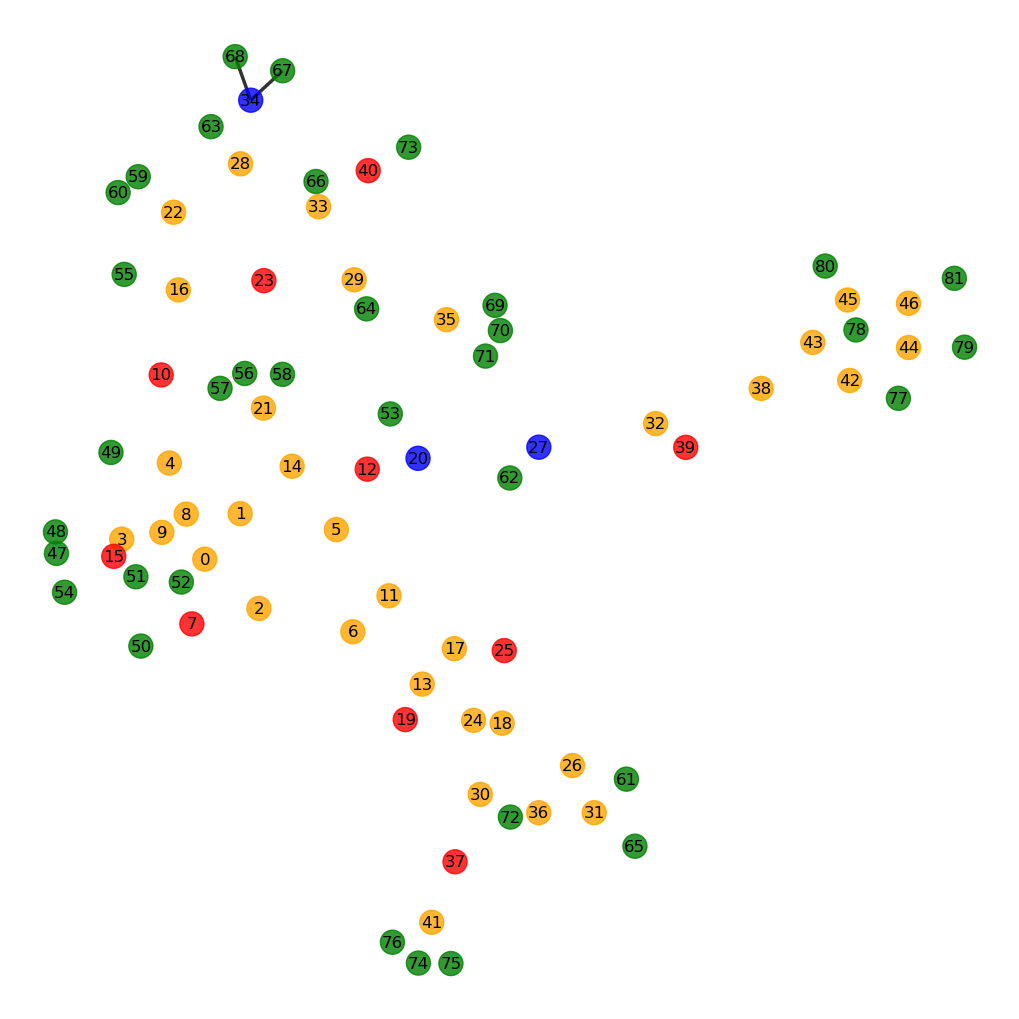

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


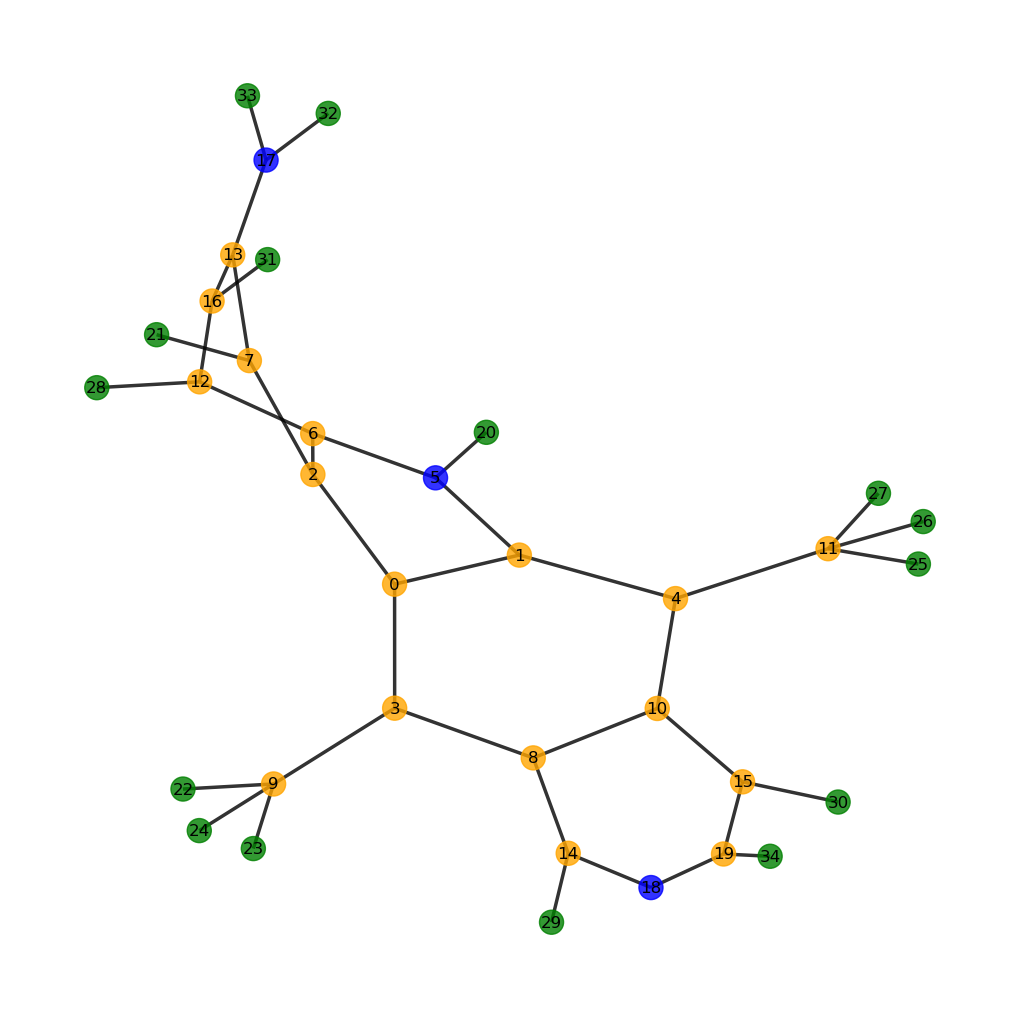

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


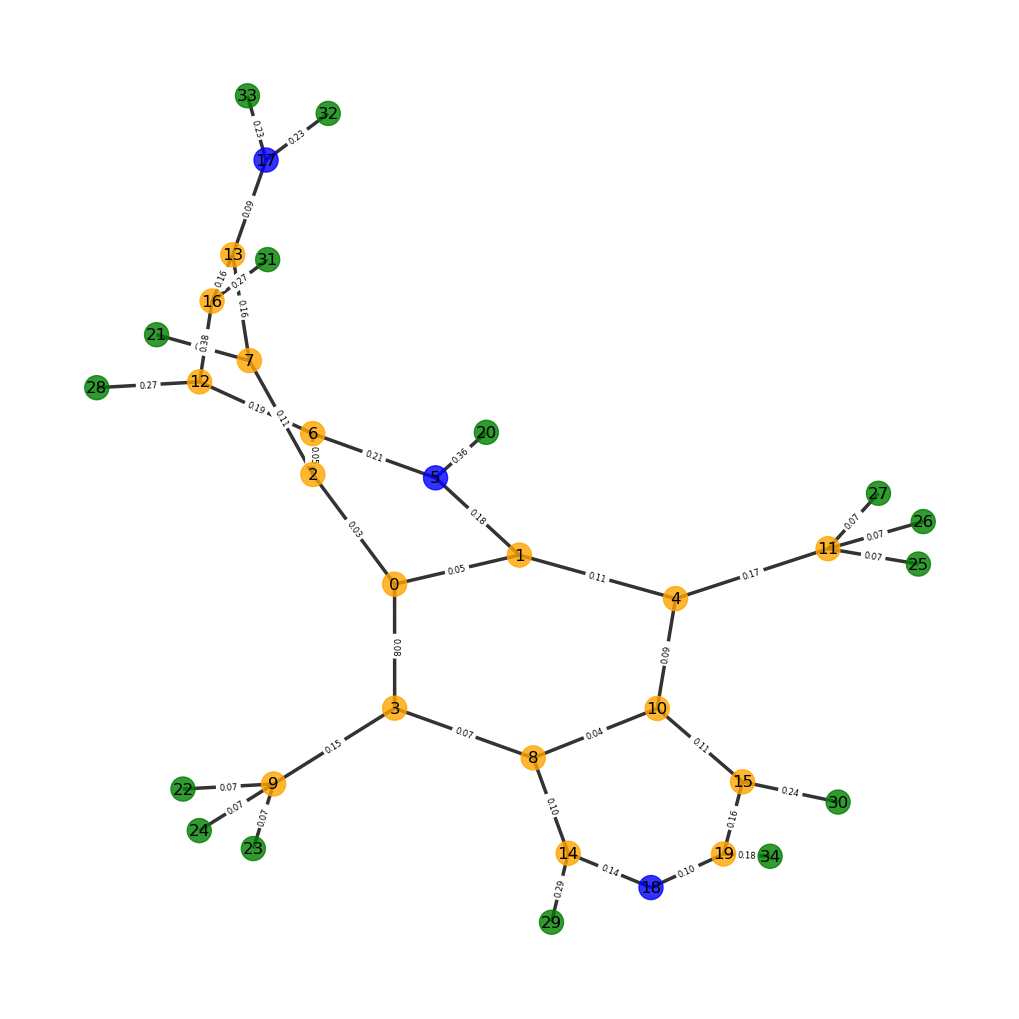

-----------------Ground truth Graph-----------------


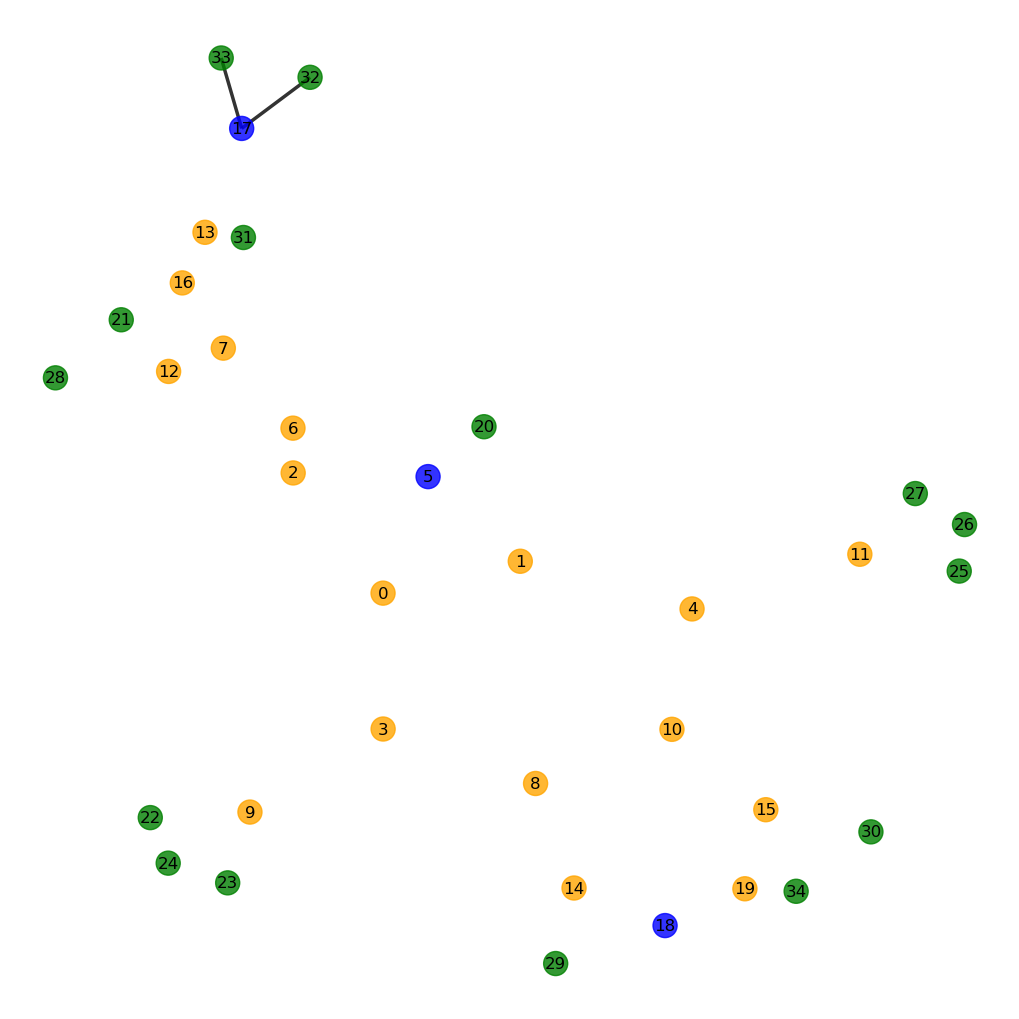

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


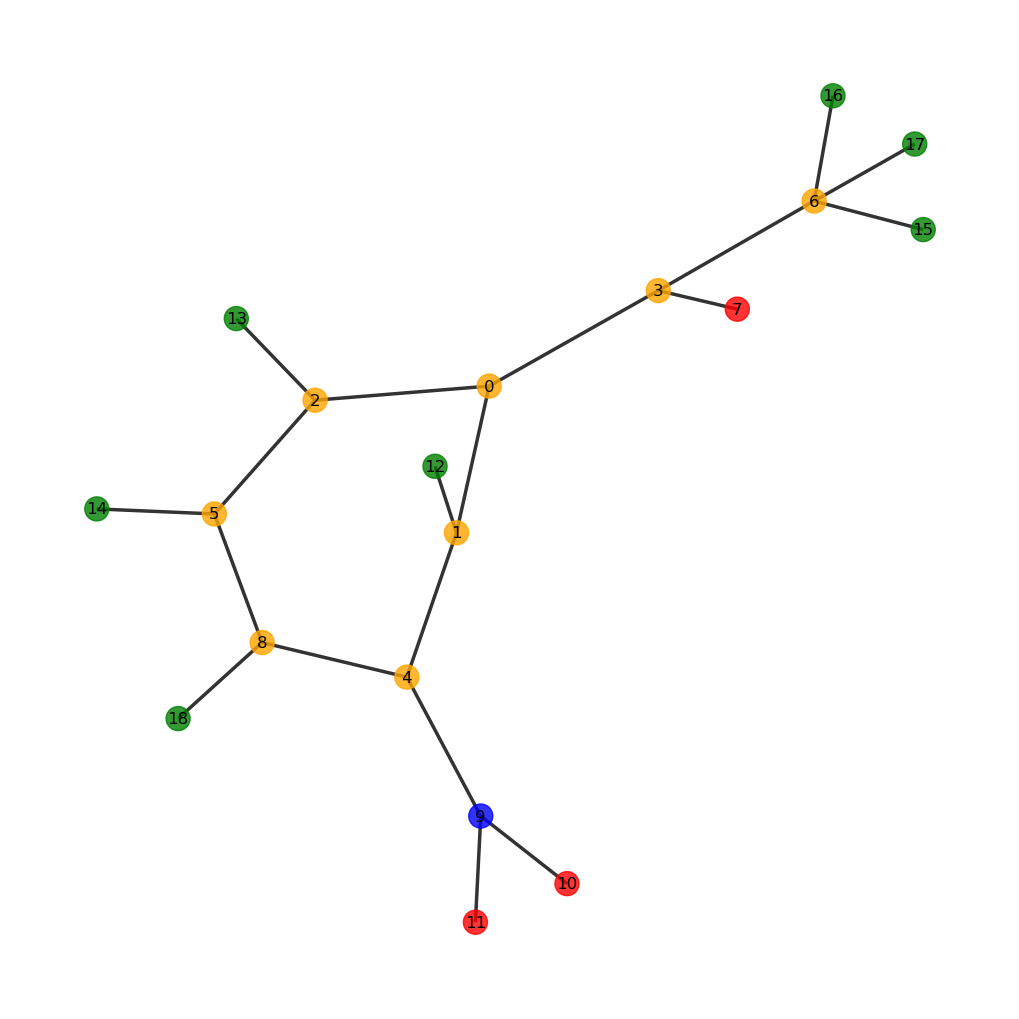

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


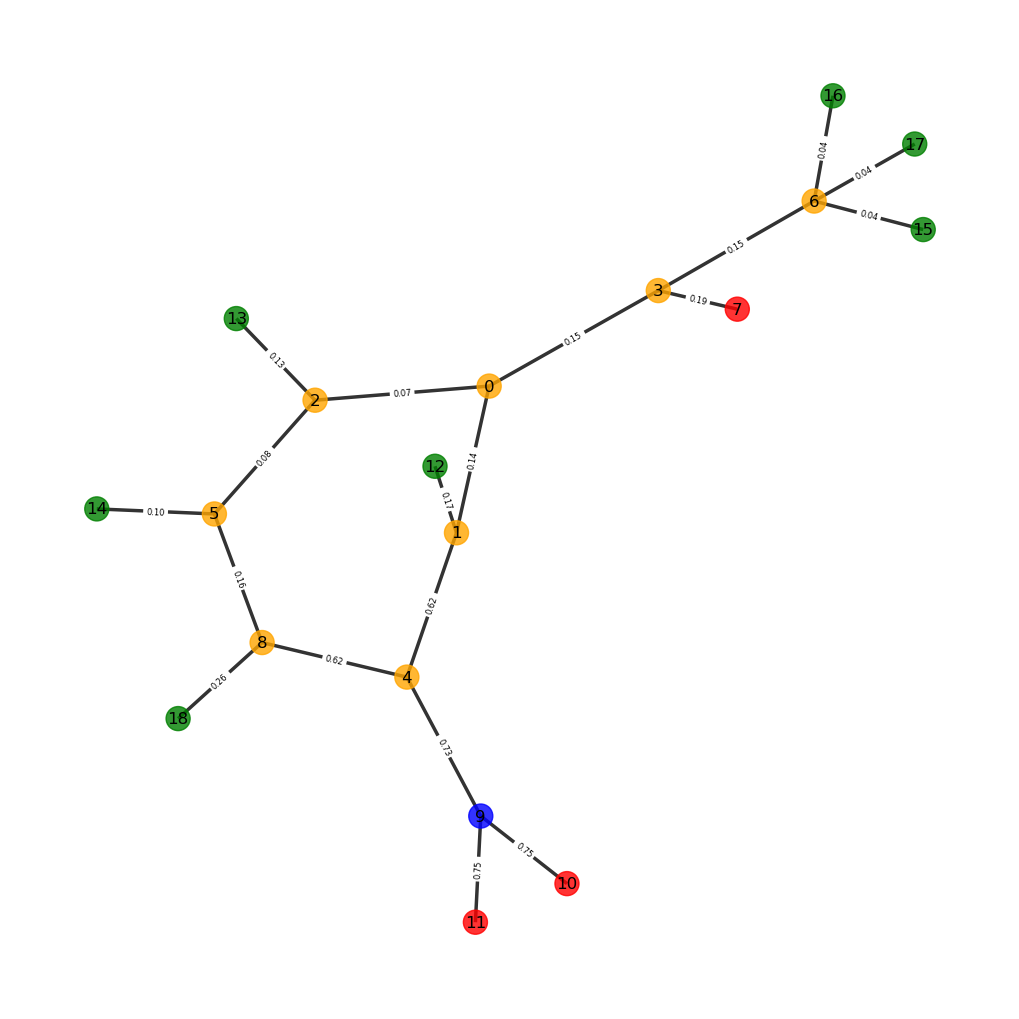

-----------------Ground truth Graph-----------------


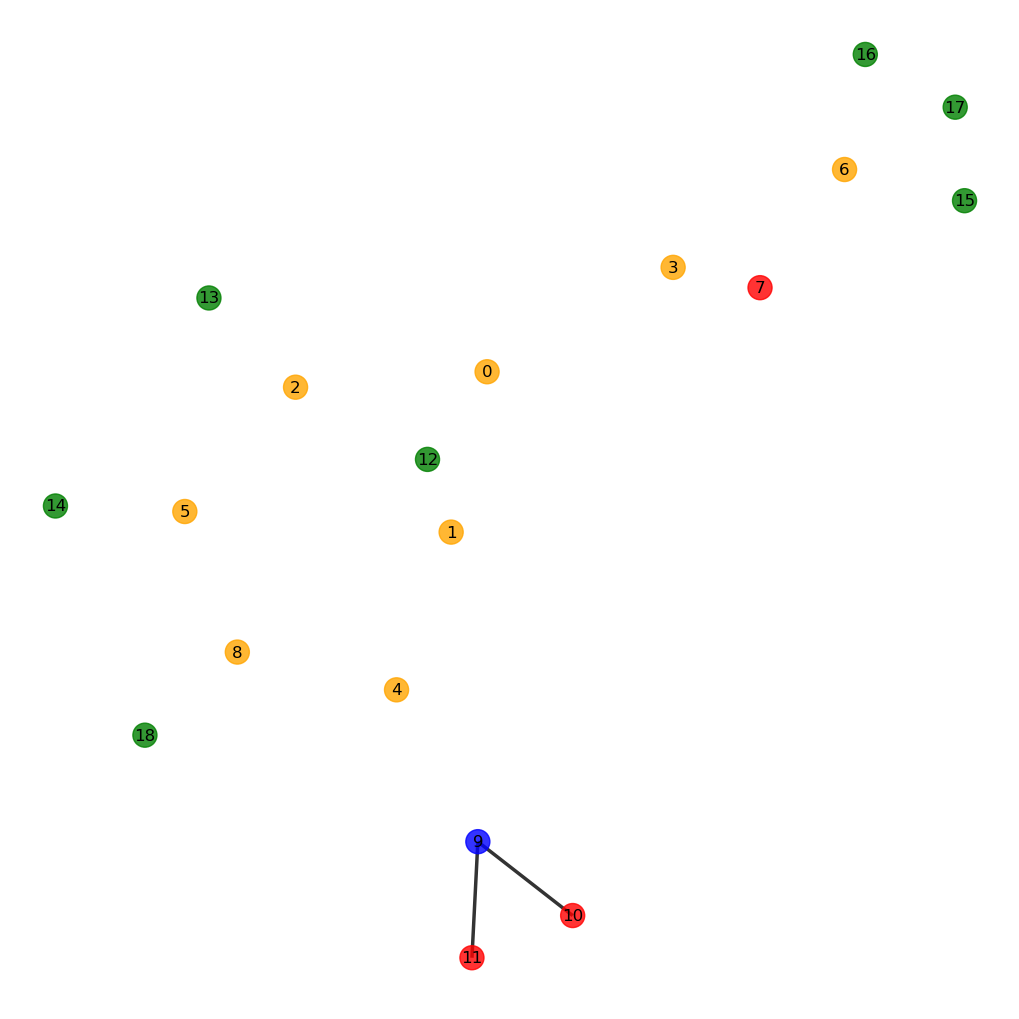

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


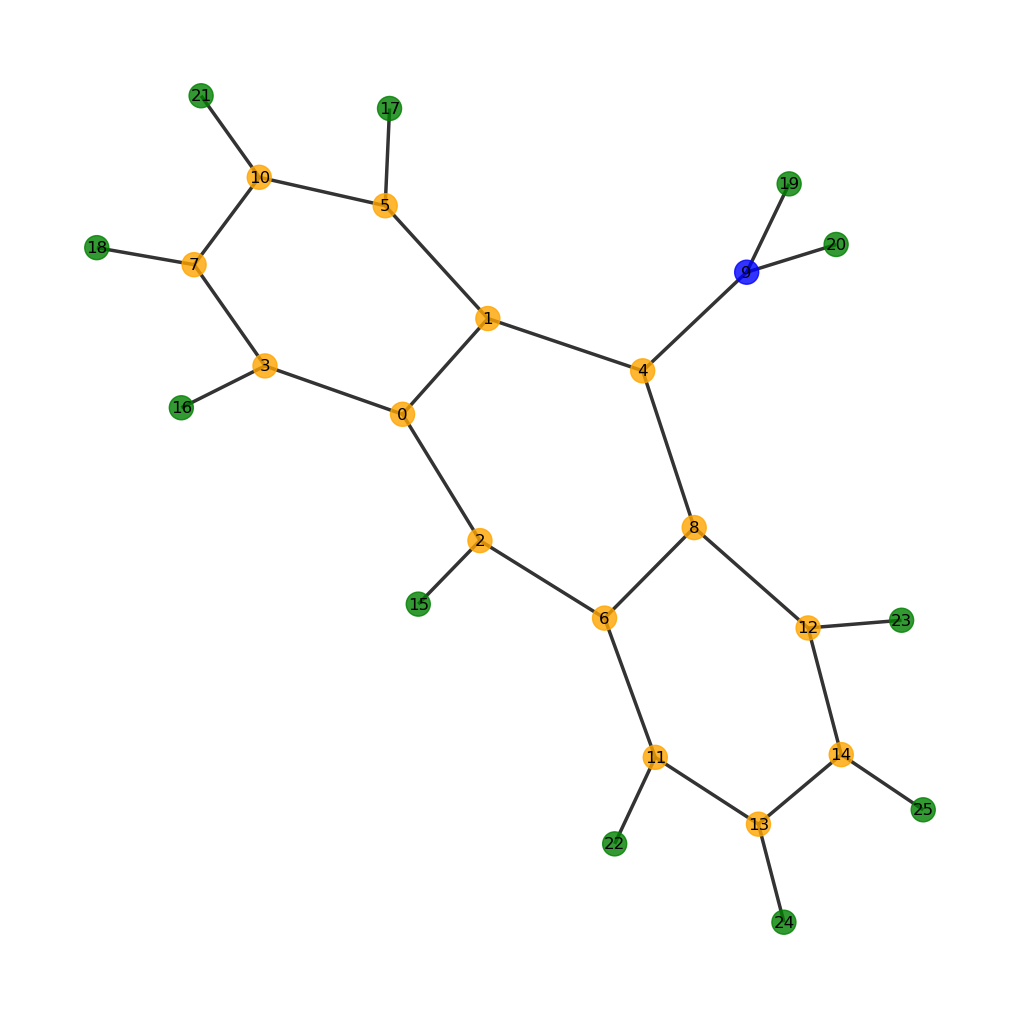

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


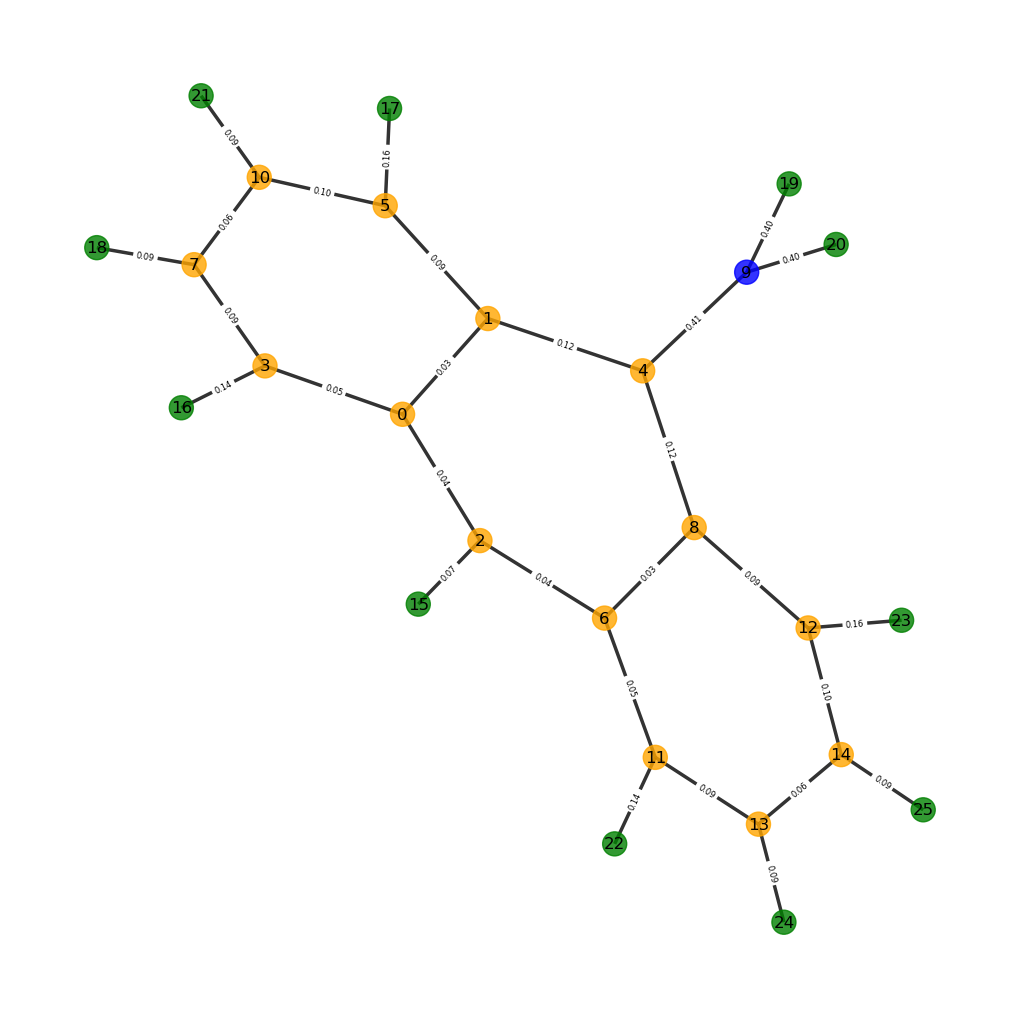

-----------------Ground truth Graph-----------------


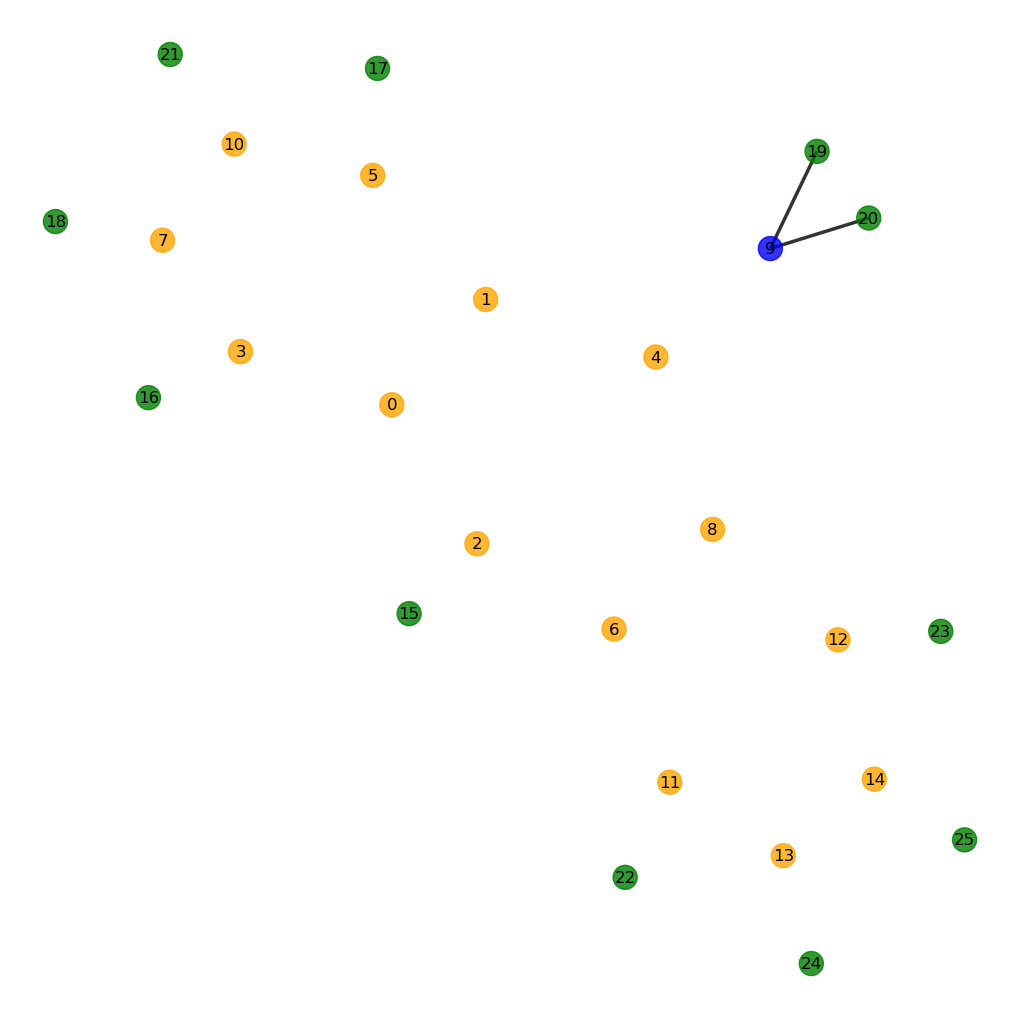

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


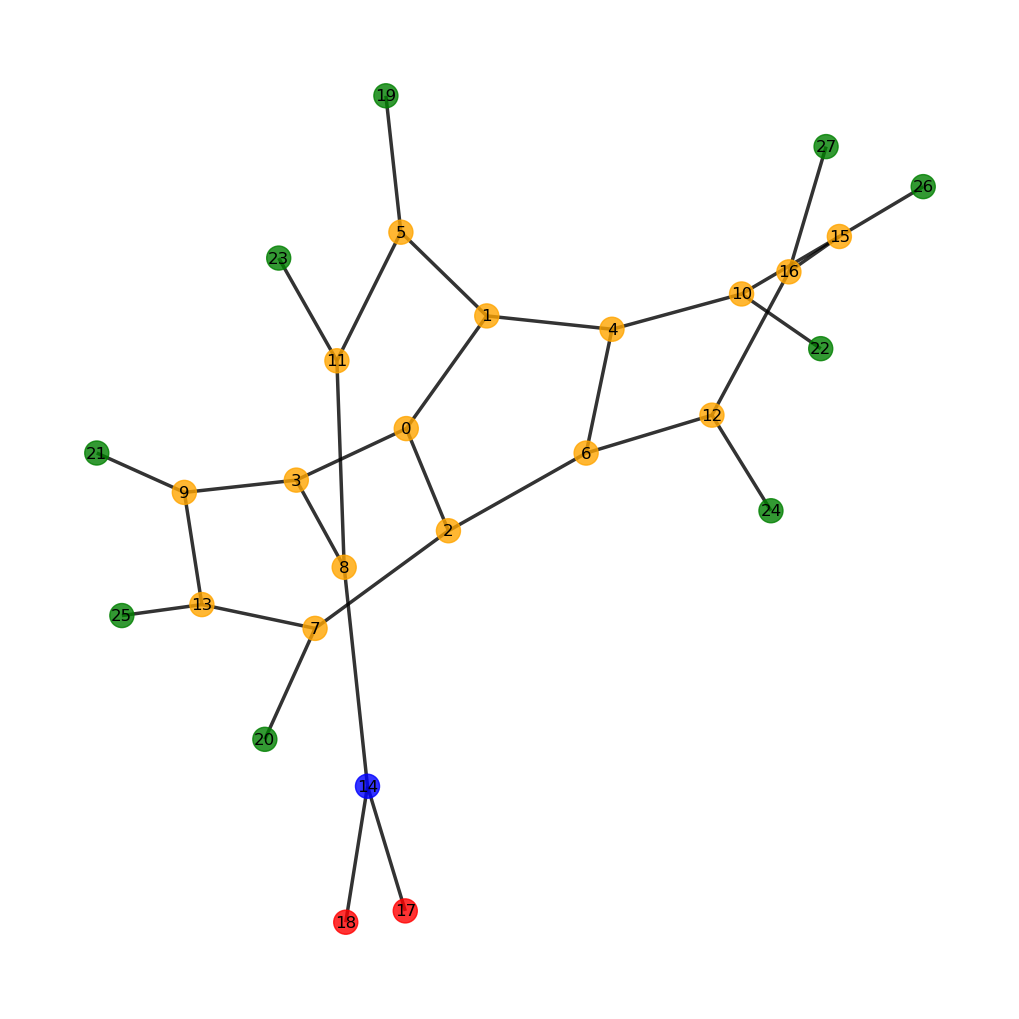

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


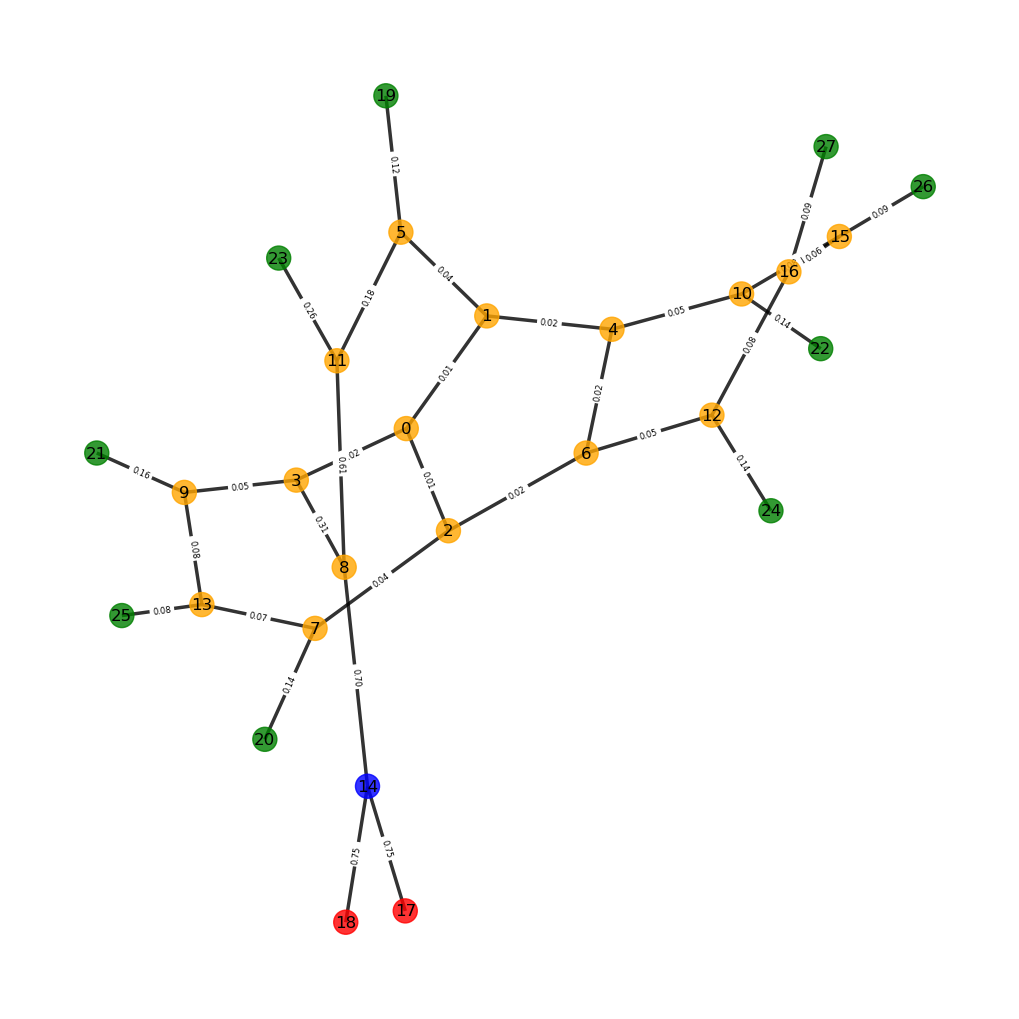

-----------------Ground truth Graph-----------------


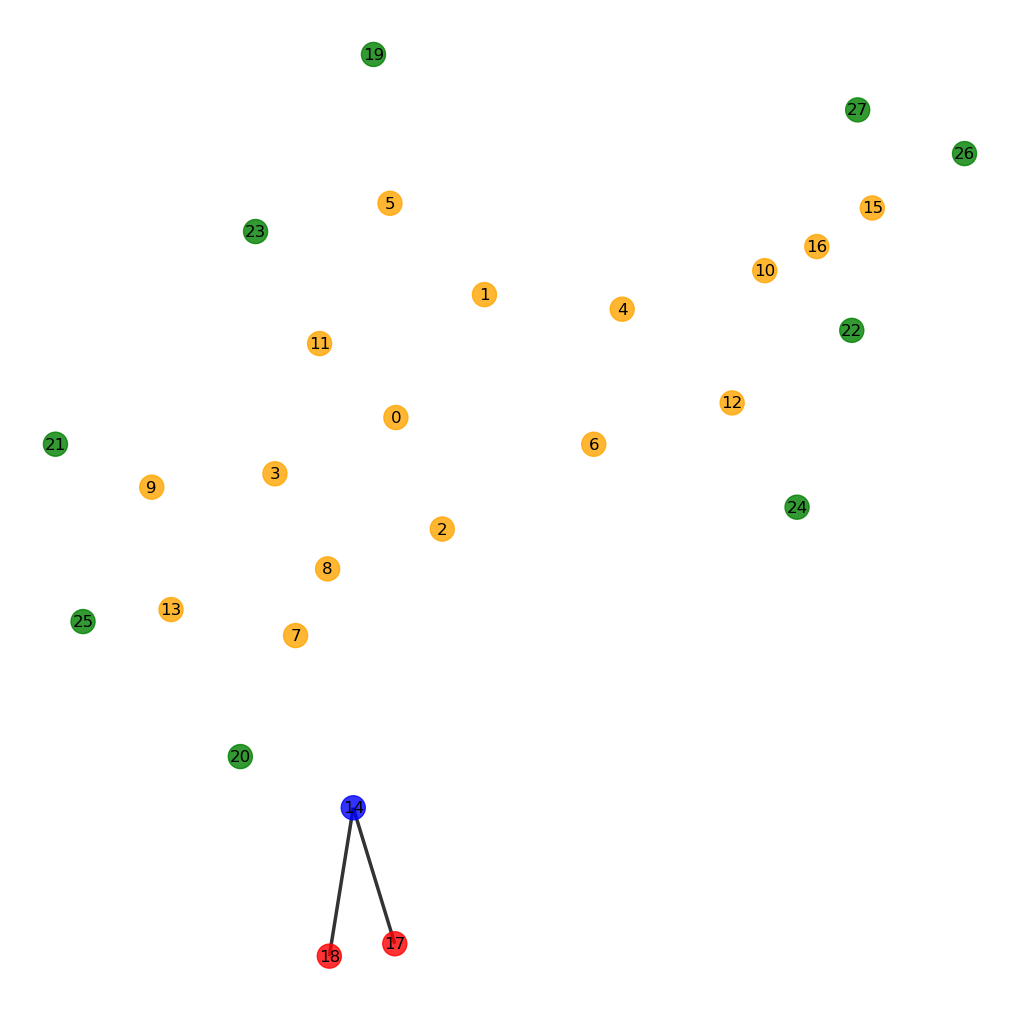

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


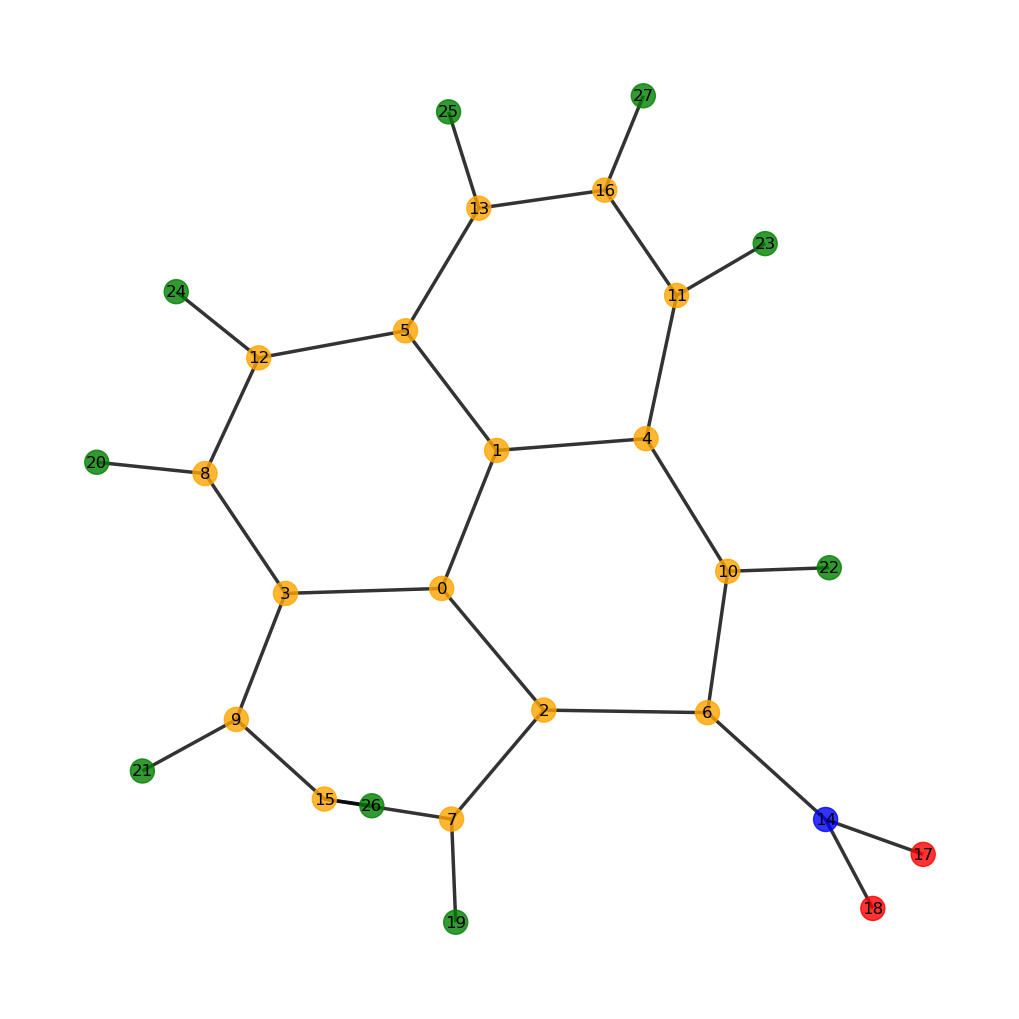

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


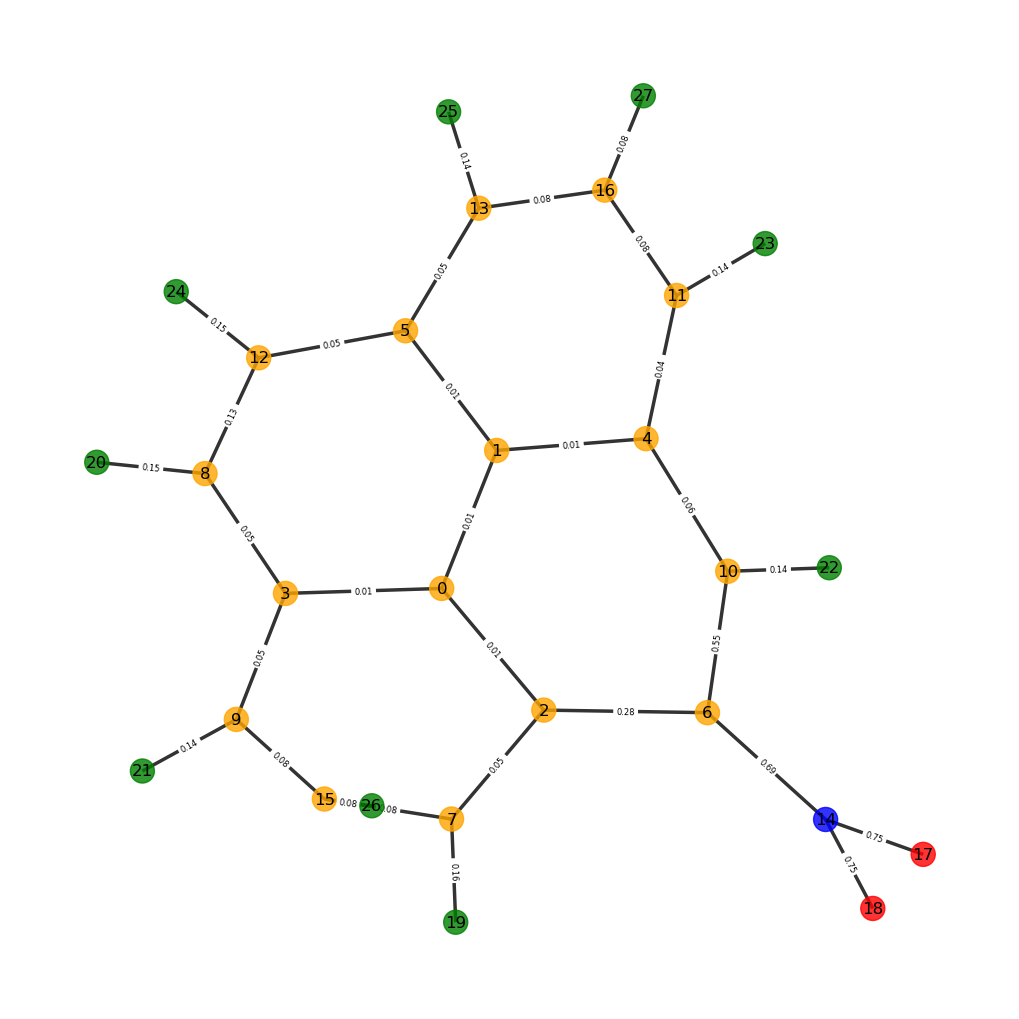

-----------------Ground truth Graph-----------------


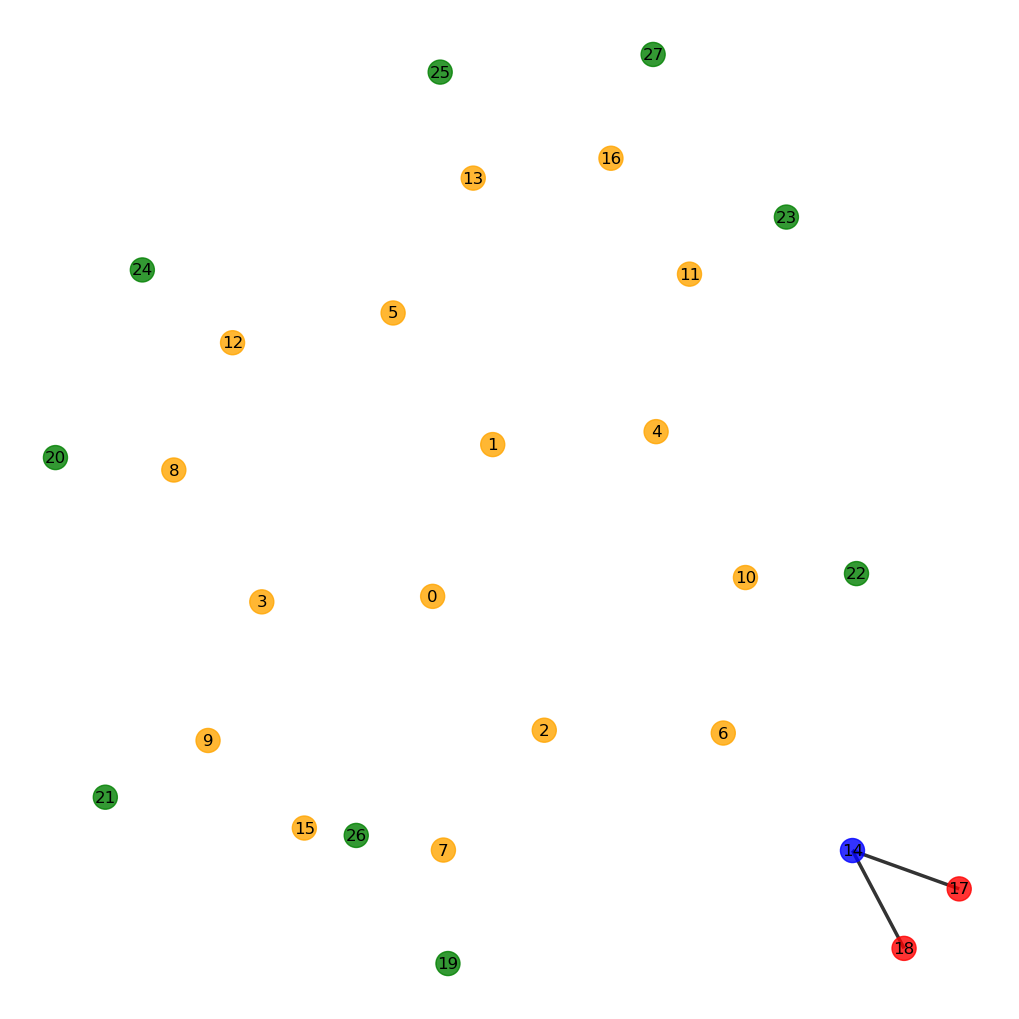

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


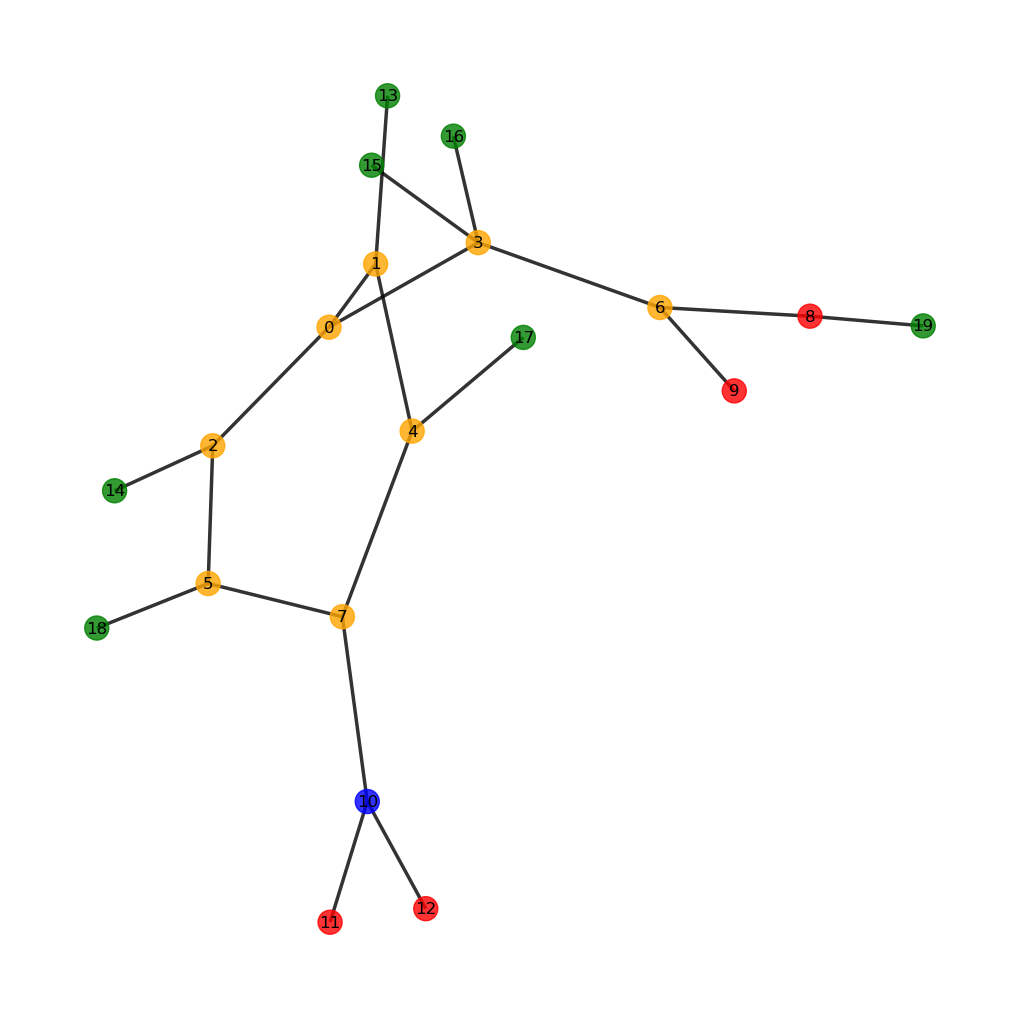

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


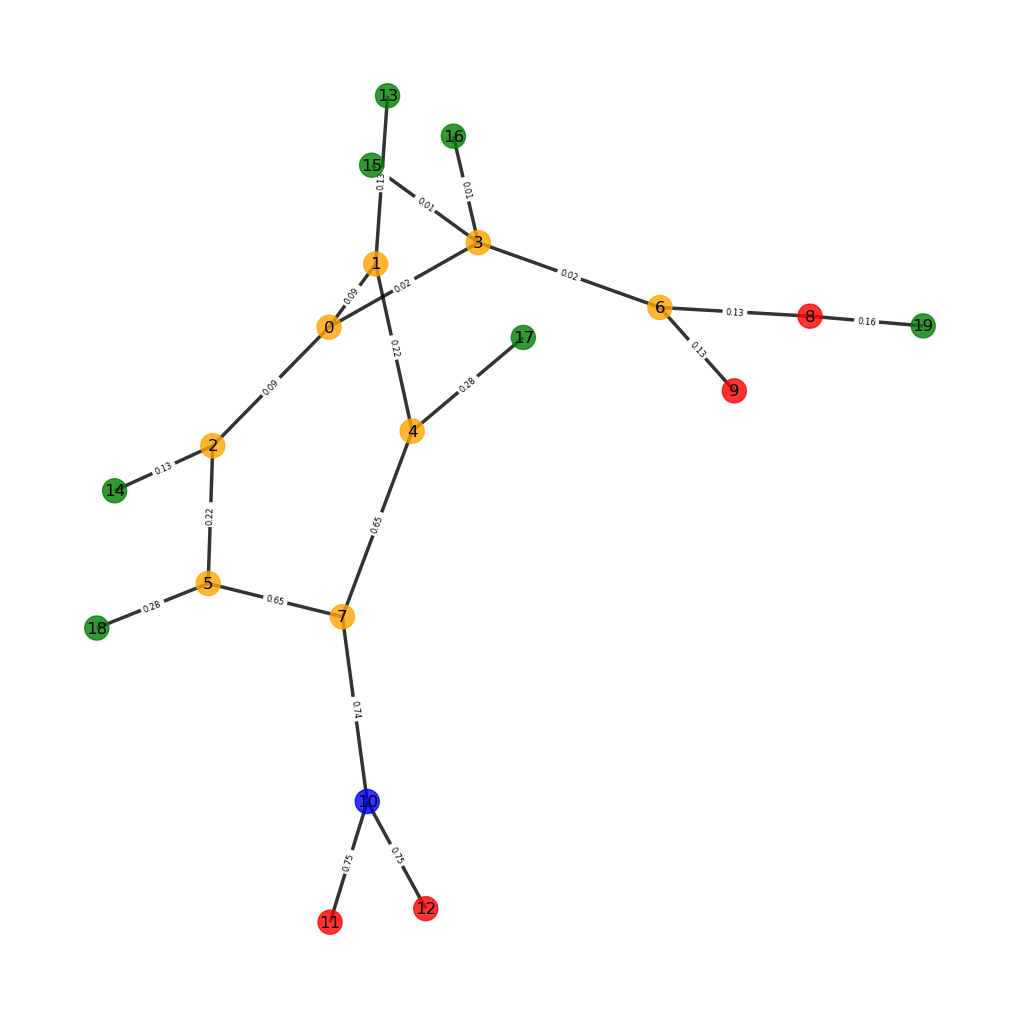

-----------------Ground truth Graph-----------------


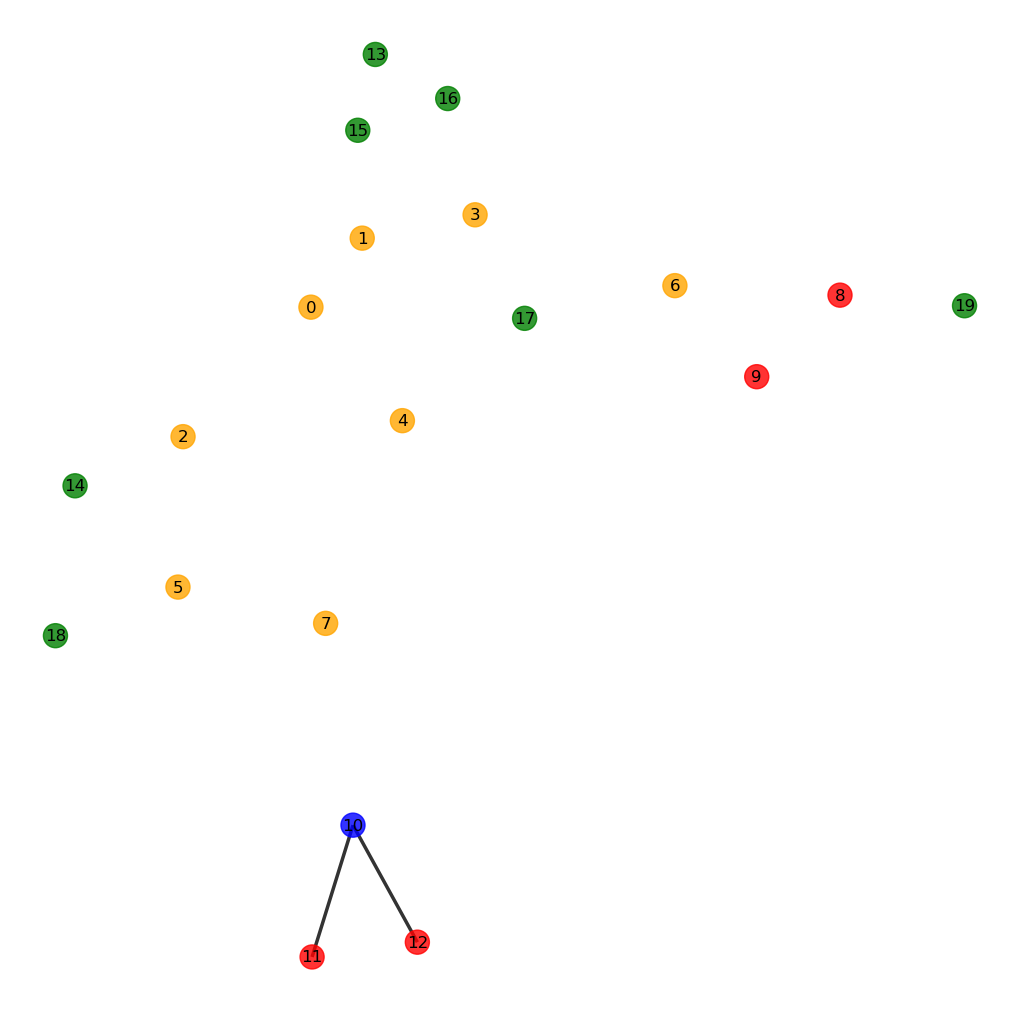

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


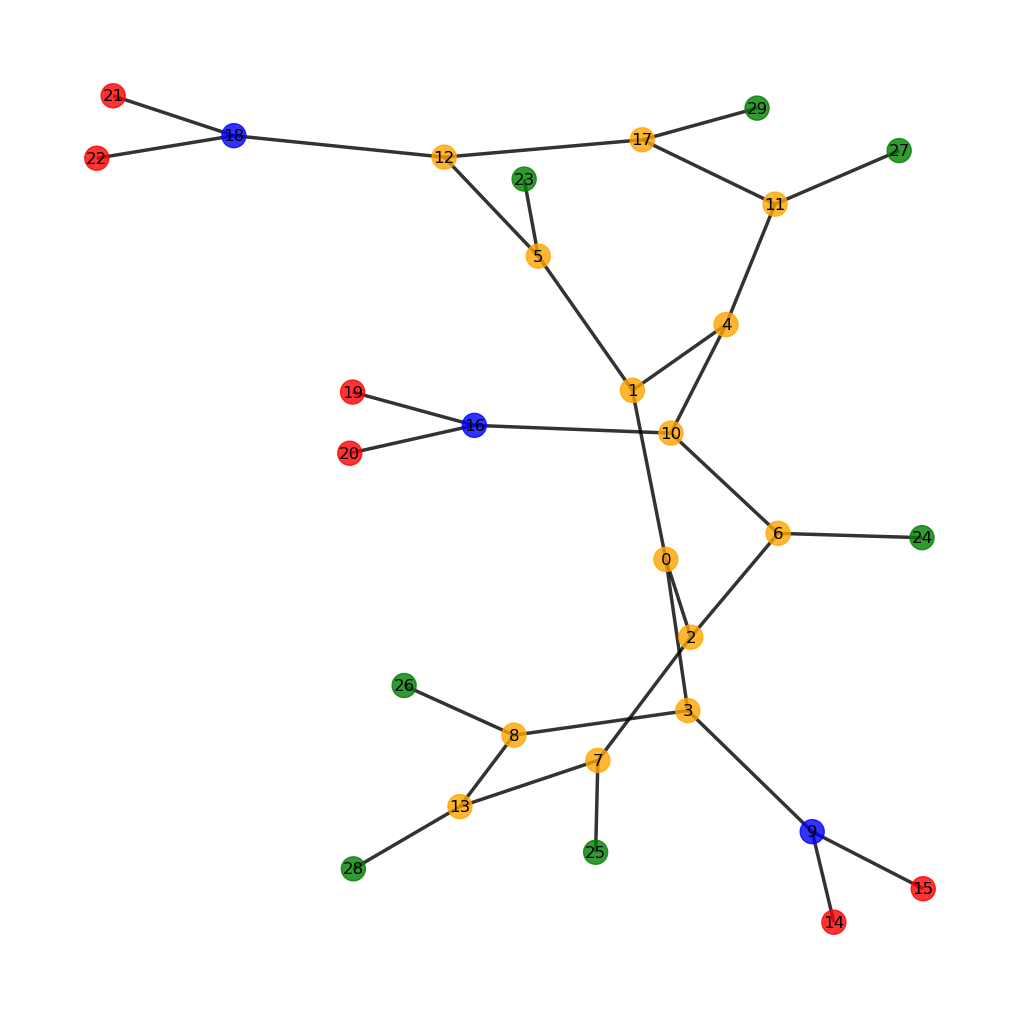

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


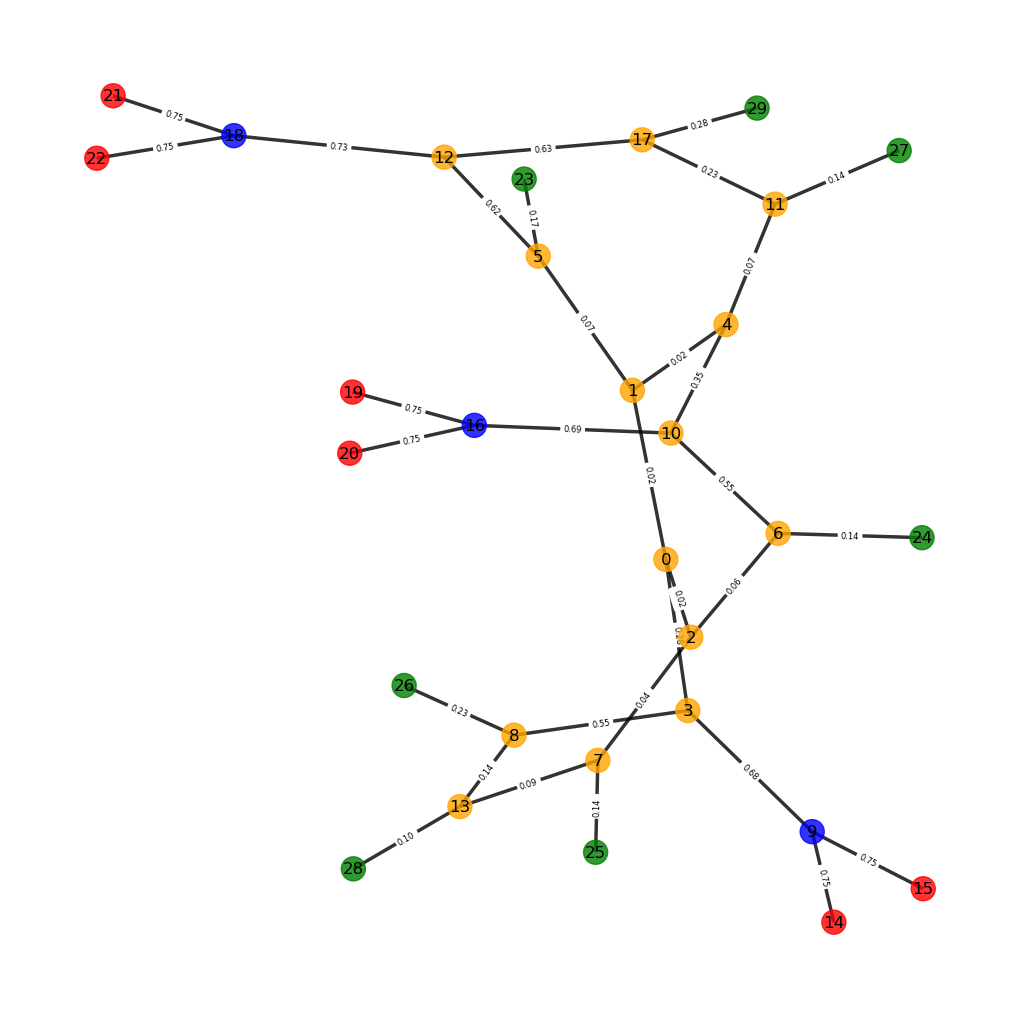

-----------------Ground truth Graph-----------------


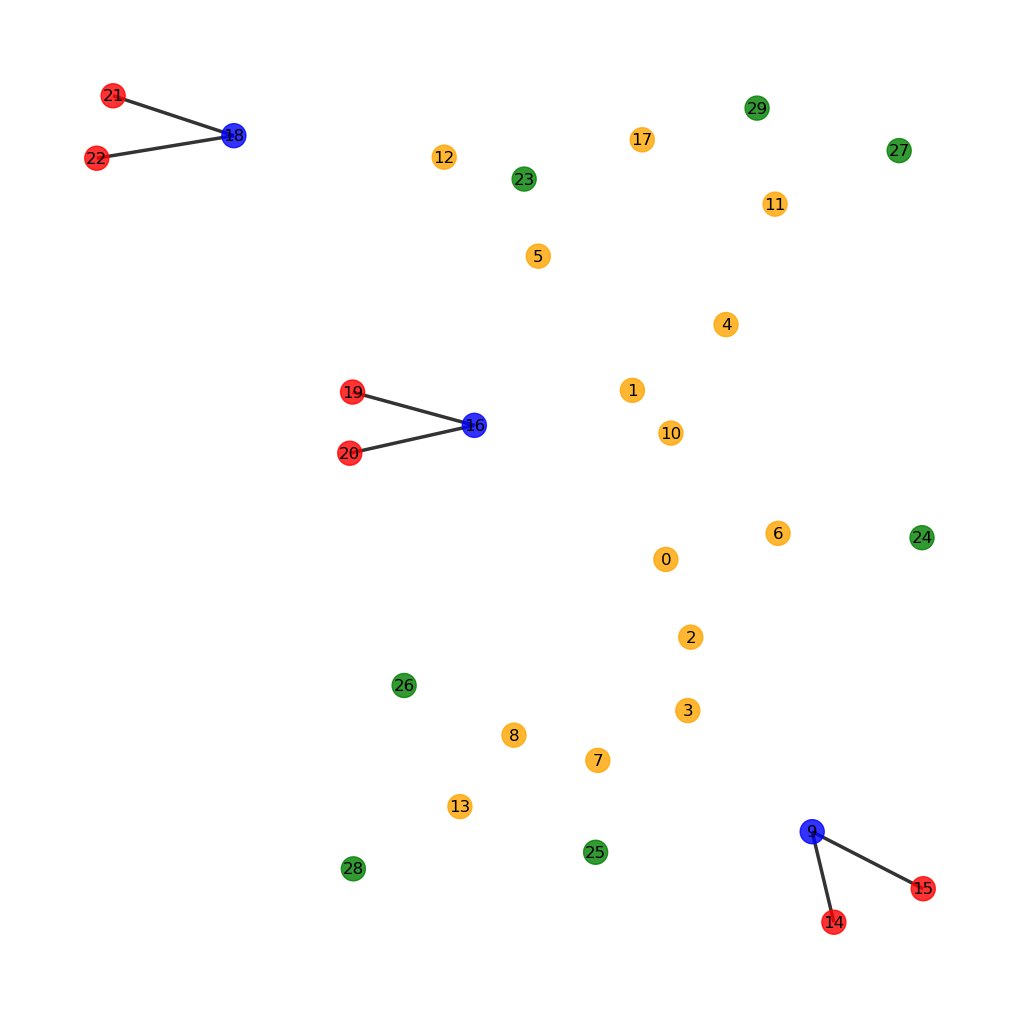

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


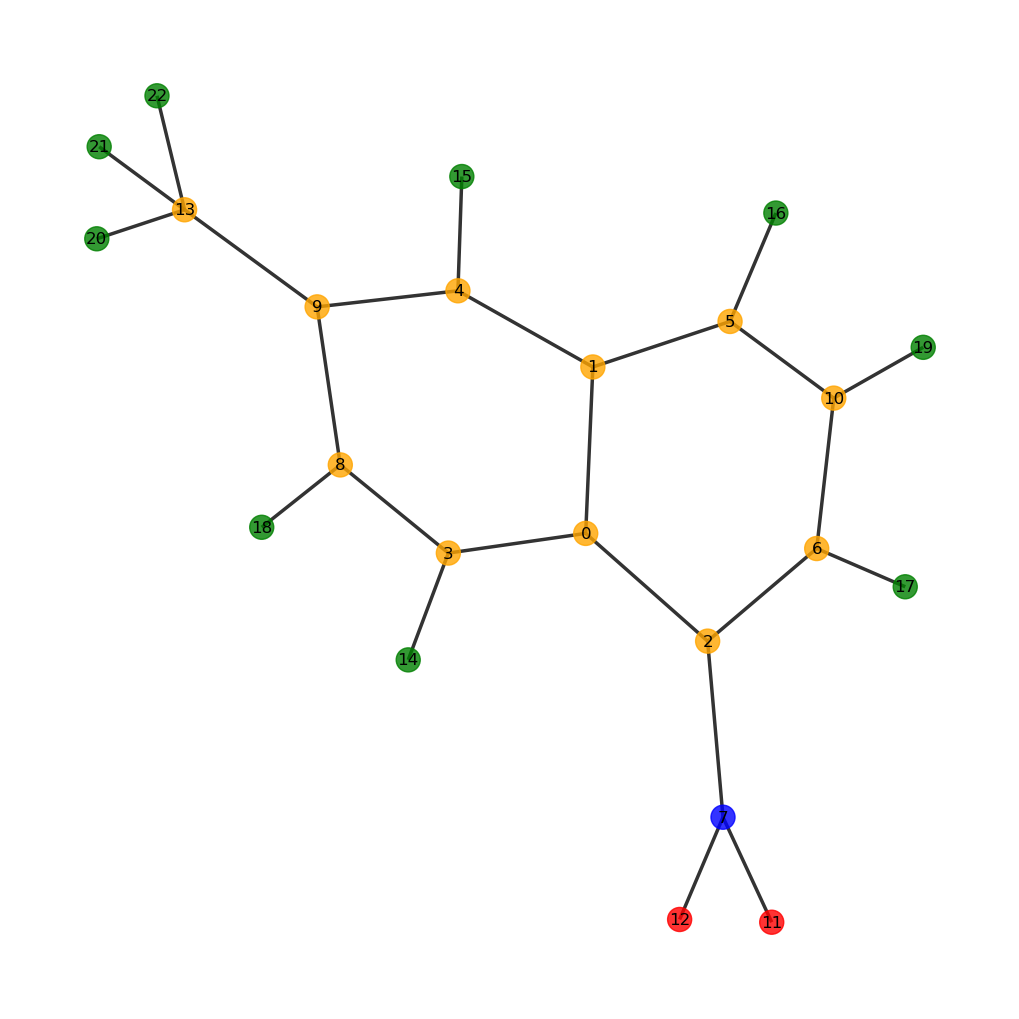

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


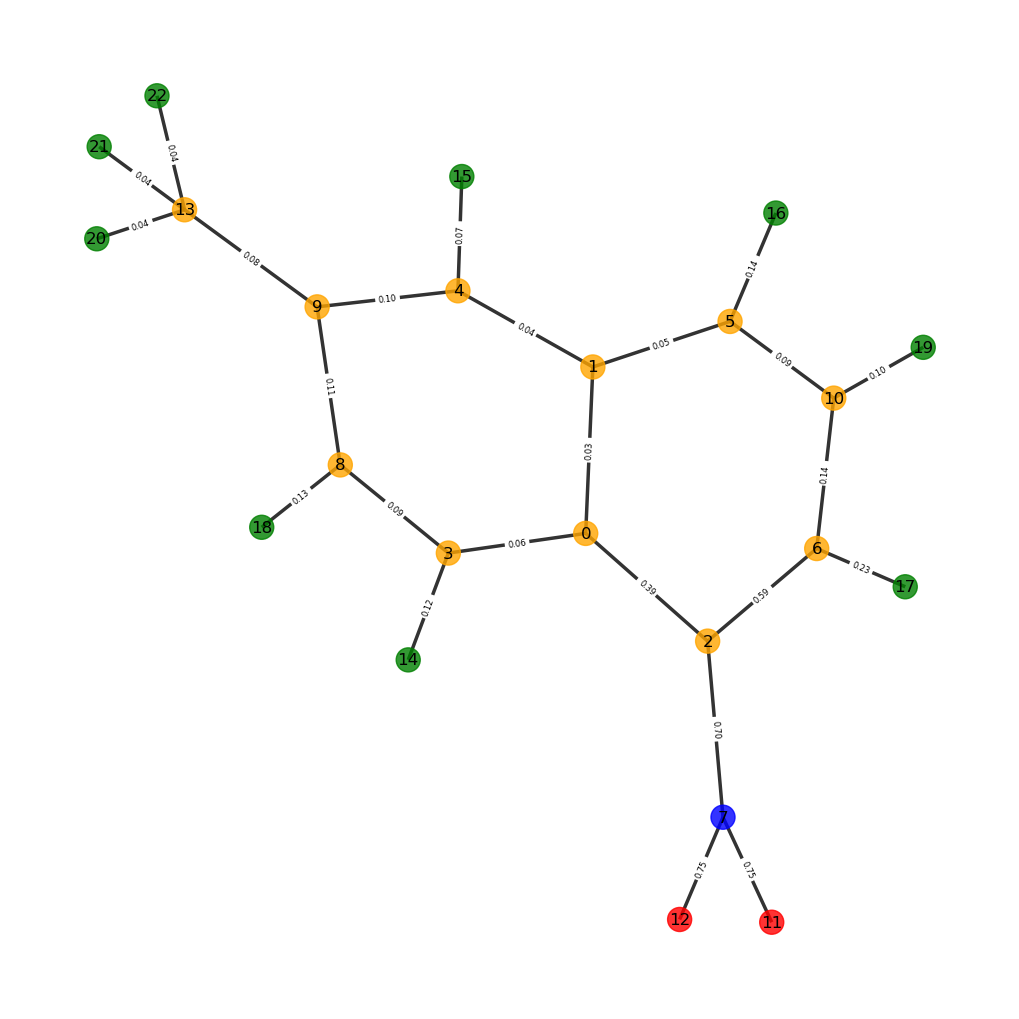

-----------------Ground truth Graph-----------------


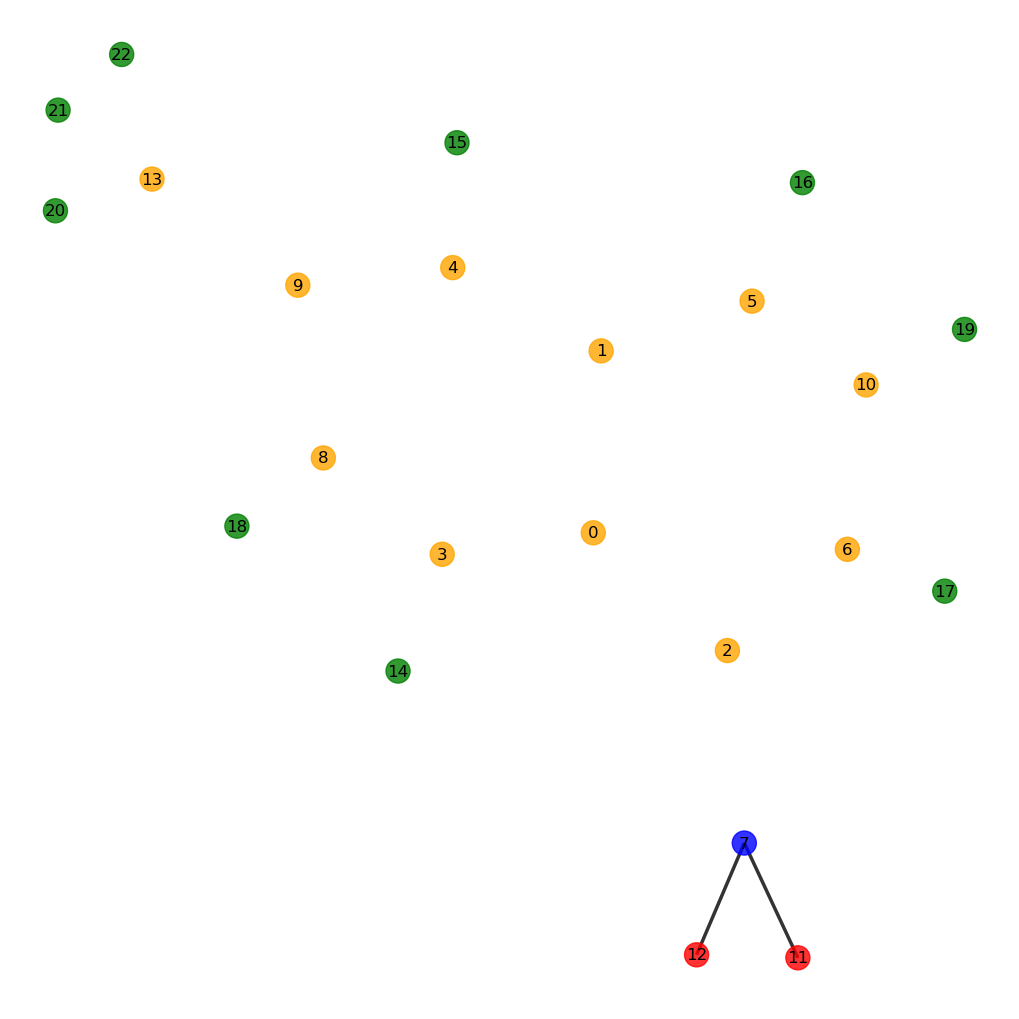

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


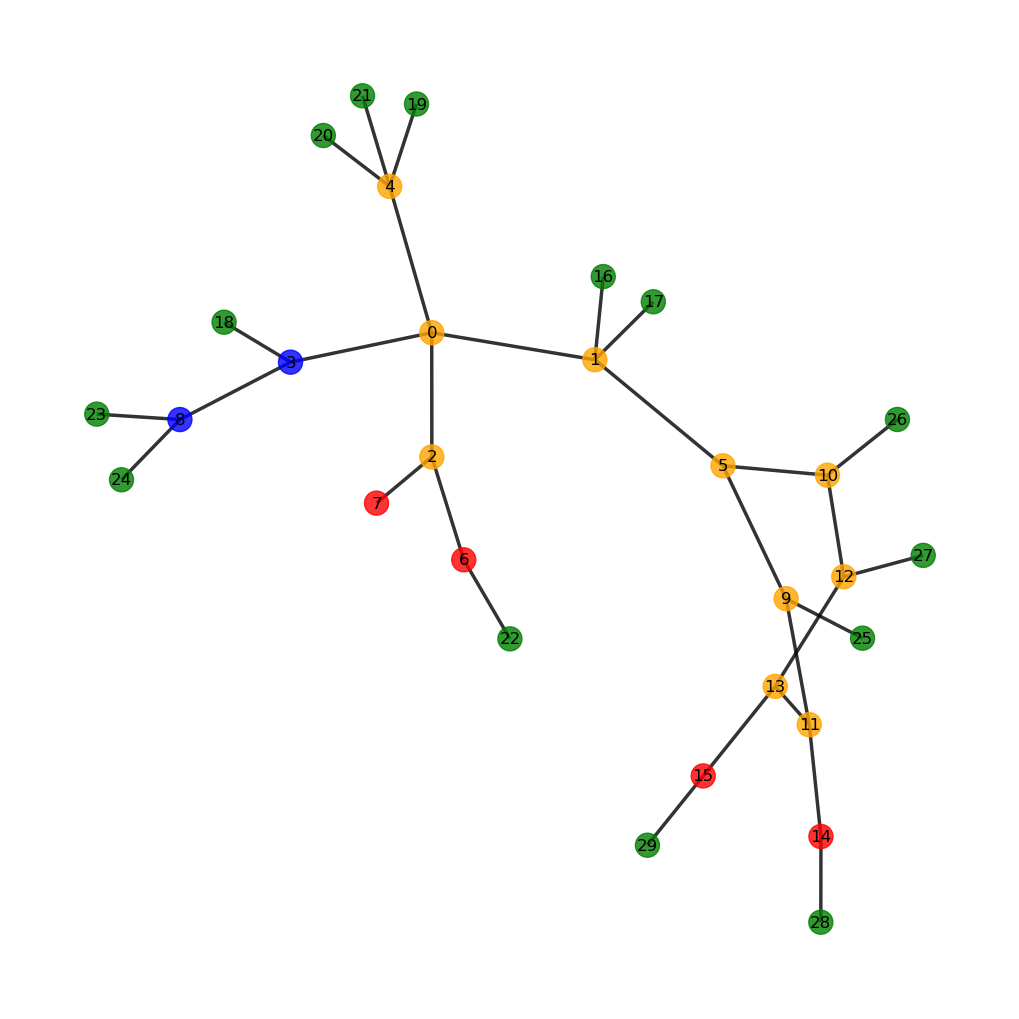

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


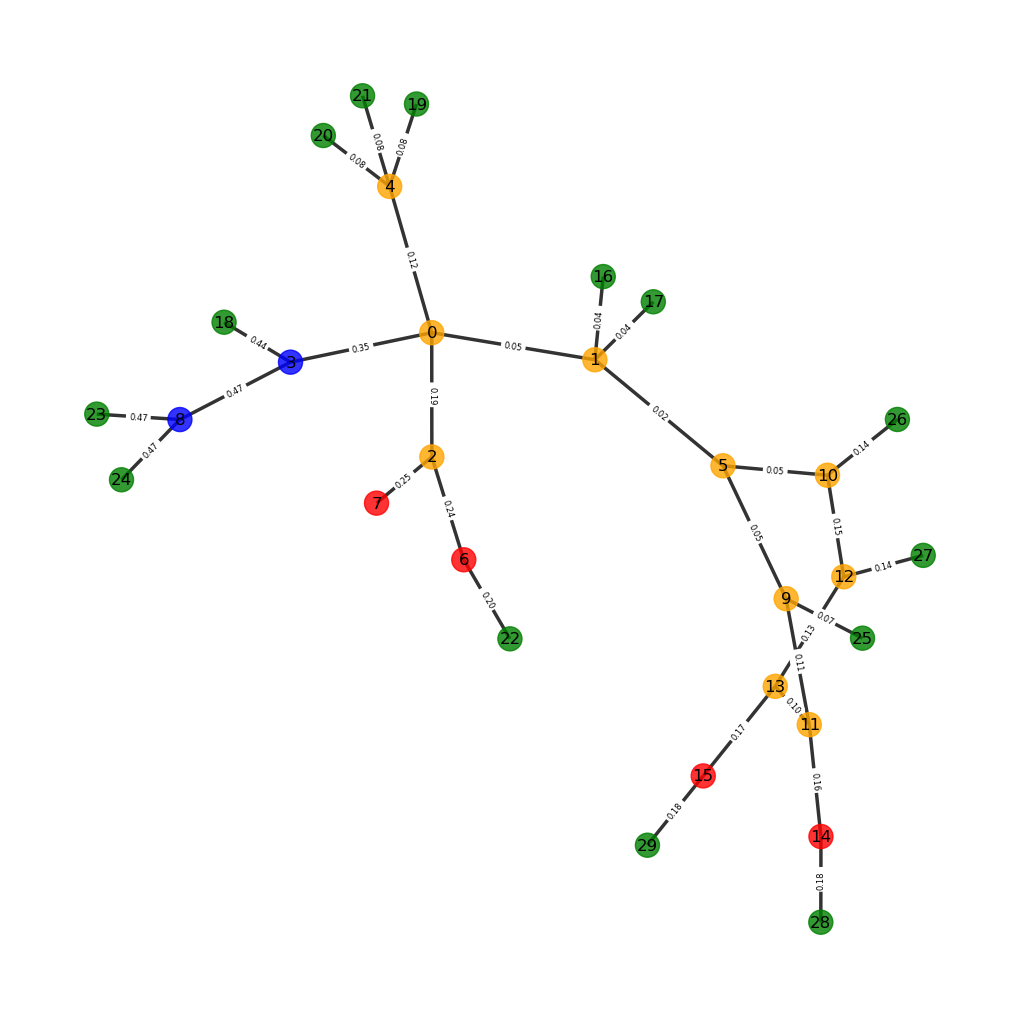

-----------------Ground truth Graph-----------------


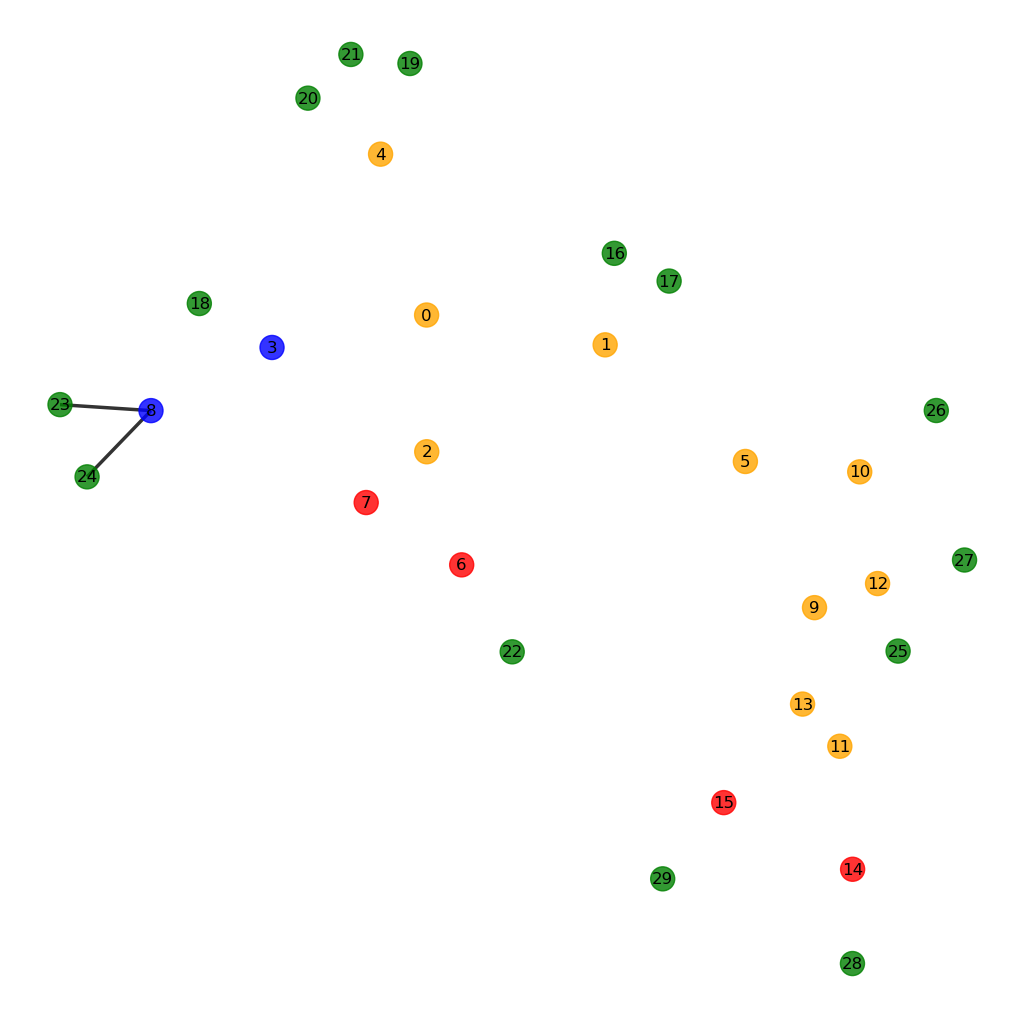

BinaryAUROC WITH FLIPPED GT MASK!: 0.12192999343504085
roc_auc_score: 0.8780700065649591
Mean individual BinaryAUROC: 0.8832935690879822
-----------------Original Graph-----------------


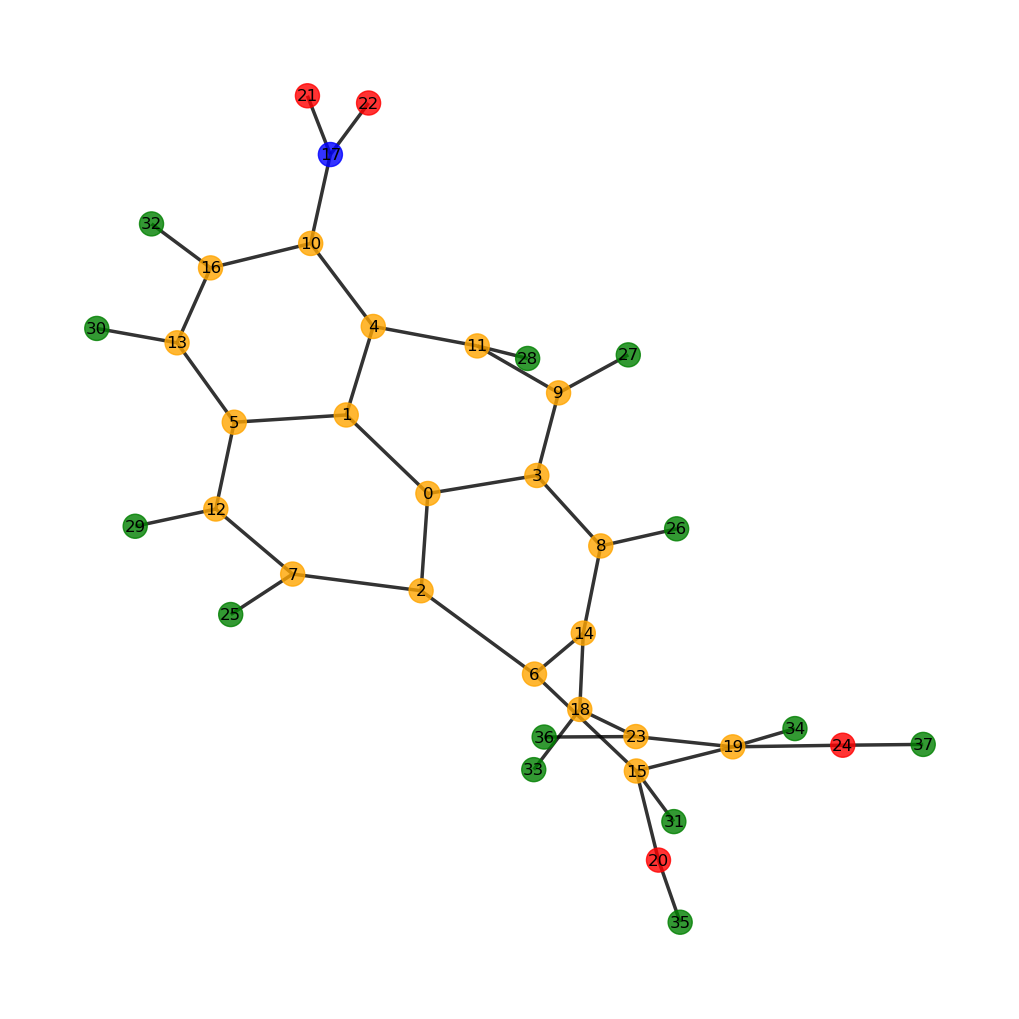

-----------------Explanation Graph-----------------
-----------Original Graph with edge weights-----------


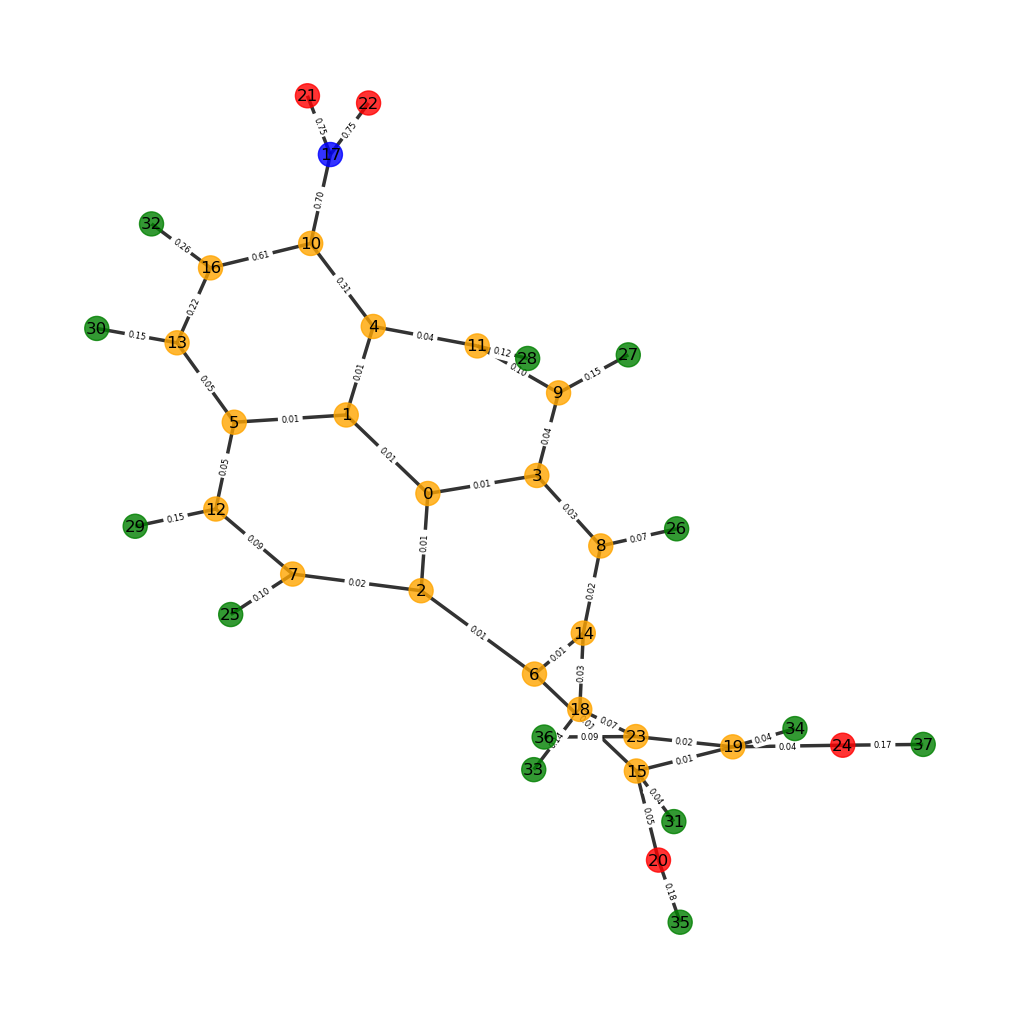

-----------------Ground truth Graph-----------------


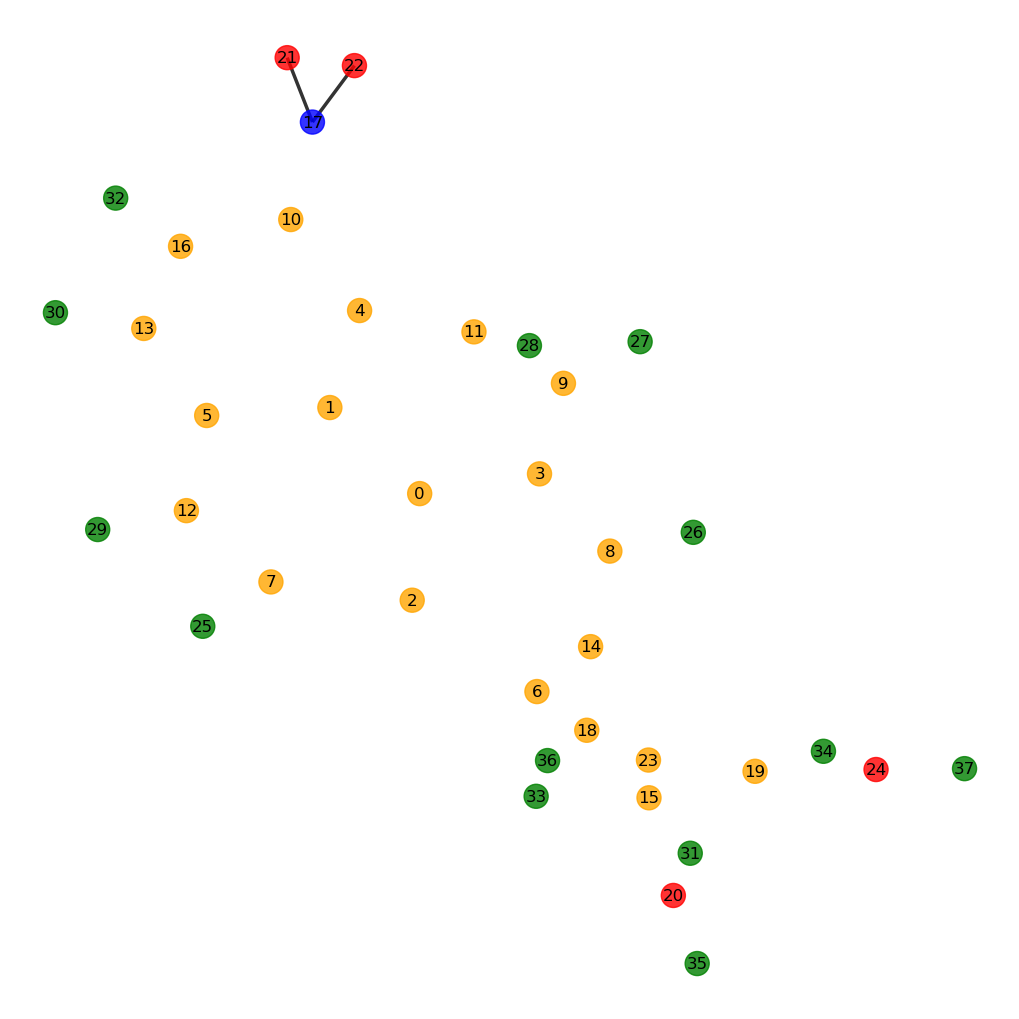

In [3]:
importlib.reload(evaluation)

datasets = [
    "BA-Shapes", "BA-Community" , "Tree-Cycles", "Tree-Grid", "BA-2Motif", "MUTAG"
]

datasets = [
    "MUTAG"
]

for dataset in datasets:
    mlp, downstreamTask = trainExplainer.loadExplainer(dataset=dataset)
    for i in range(16):
        auc, ind_aucs, infTime = evaluation.evaluate(datasetName=dataset, mlp=mlp, downstreamTask=downstreamTask, index=i)


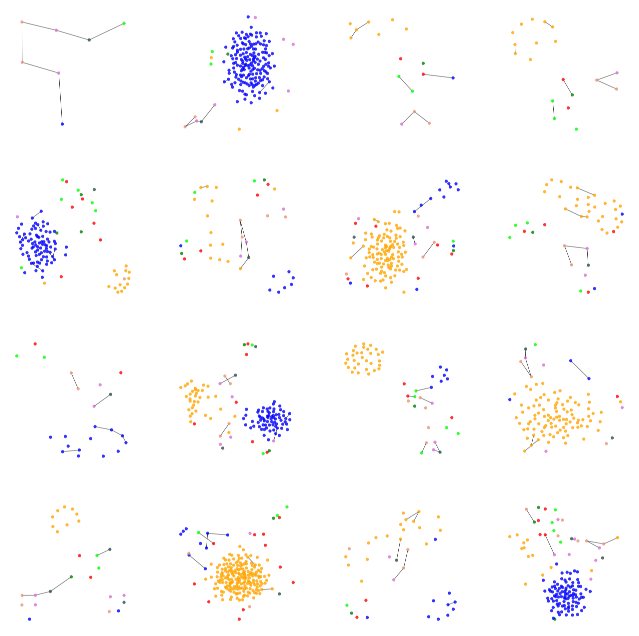

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

img_dir = "explanations"
image_paths = sorted([os.path.join(img_dir, f) for f in os.listdir(img_dir) if f.endswith(".png")])

rows, cols = 4, 4
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))

for ax, img_path in zip(axes.flat, image_paths):
    img = mpimg.imread(img_path)
    ax.imshow(img)
    ax.axis('off')

fig.subplots_adjust(wspace=0.3, hspace=0.3)
plt.savefig("grid_explanations.png", dpi=300, bbox_inches='tight')
plt.show()

In [8]:
import wandb
wandb.finish()

In [10]:
import utils
import torch
from torch_geometric.loader import DataLoader
from torch_geometric.data import Data

In [14]:
data, labels = datasetLoader.loadOriginalNodeDataset("BA-Shapes")
graph_dataset_seed = 42
generator1 = torch.Generator().manual_seed(graph_dataset_seed)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(data, [0.8, 0.1, 0.1], generator1)

c:\Users\trist\anaconda3\Lib\site-packages\torch\utils\data\dataset.py:473: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(


In [16]:
k = 5

data1 = data

printLoader = DataLoader([data1], 1, False)

temperature = 1

In [17]:
mlp.eval()
downstreamTask.eval()

w_ij = mlp.forward(downstreamTask, data1.x, data1.edge_index)

print(w_ij)

edge_ij = mlp.sampleGraph(w_ij)
print(edge_ij)

_, top_k_indices = torch.topk(edge_ij, k=k*2, largest=True)

mask = torch.zeros_like(edge_ij, dtype=torch.bool)
mask[top_k_indices] = True

sortedTopK, indices = torch.sort(top_k_indices)

edge_index_masked = data1.edge_index[:,mask]
weights_masked = edge_ij[sortedTopK]                # This is ordered by size

# edge_index_masked and weights_masked to display top 5 edges; data1.edge_index and w_ij to display original graph
Gs = Data(x=data1.x, edge_index=edge_index_masked, edge_attr=weights_masked)

#print(Gs.edge_attr)
#print(weights_masked)

print("-----------------Original Graph-----------------")

#pos = utils.plotGraph(data1, MUTAG=MUTAG)
pos = utils.plotGraphAll(data1, number_nodes=True, graph_task=True)

print("-----------------Sampled Graph-----------------")

#pos1 = utils.plotGraph(Gs, pos=pos, color_map=None, edge_weights=True, MUTAG=MUTAG)
pos1 = utils.plotGraphAll(Gs, pos=pos, number_nodes=True, graph_task=True, edge_weights=True)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (4110x120 and 180x64)

In [18]:
data, labels = datasetLoader.loadOriginalNodeDataset("BA-Shapes")
graph_dataset_seed = 42
generator1 = torch.Generator().manual_seed(graph_dataset_seed)
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(data, [0.8, 0.1, 0.1], generator1)

c:\Users\trist\anaconda3\Lib\site-packages\torch\utils\data\dataset.py:473: UserWarning: Length of split at index 2 is 0. This might result in an empty dataset.
  warnings.warn(


In [23]:
import random
import evaluation
from torch_geometric.utils import k_hop_subgraph

motifNodesOriginal = [i for i in range(400,700,5)]

randomAUCNode = random.choice(motifNodesOriginal)
currentAUC = randomAUCNode

AUC of ROC: 0.9920886158943176
BinaryAUROC: 0.9920886075949367
roc_auc_score: 0.9920886075949368
0.9920886075949368


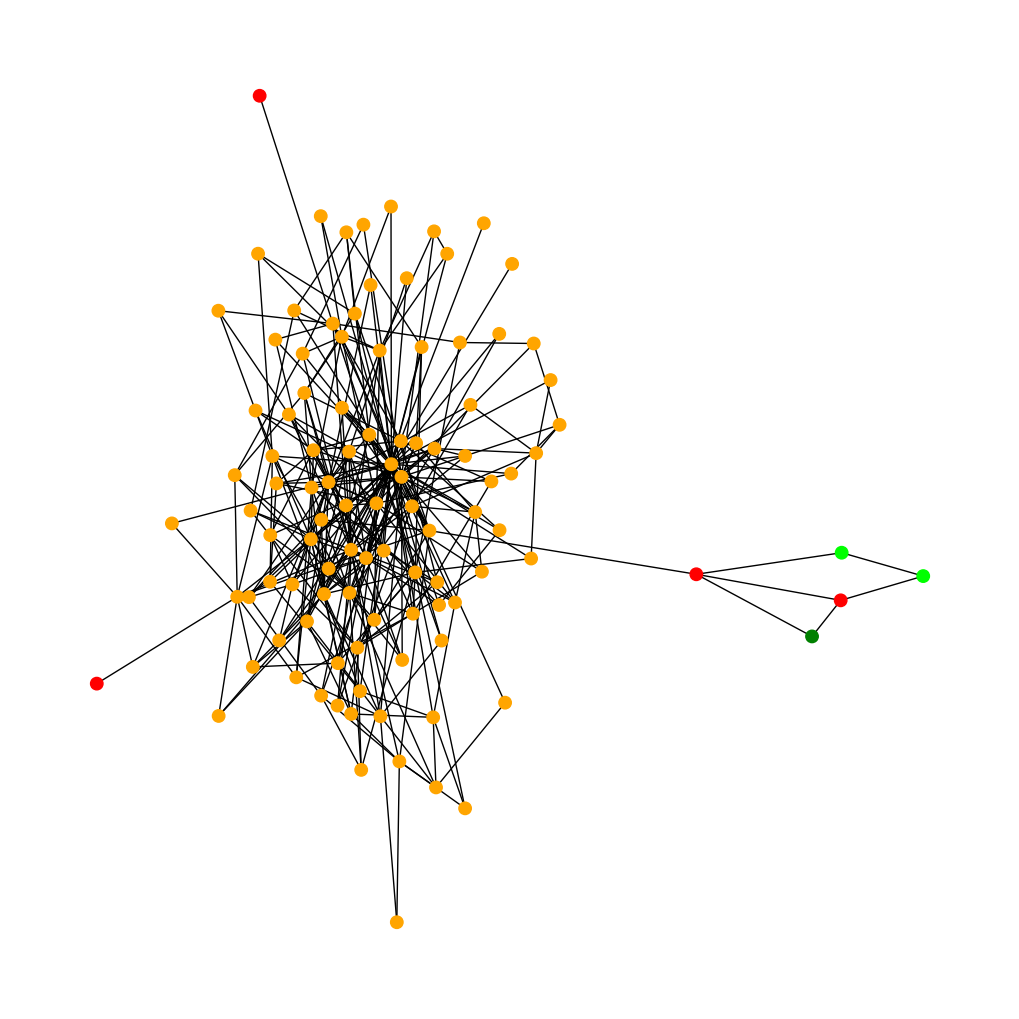

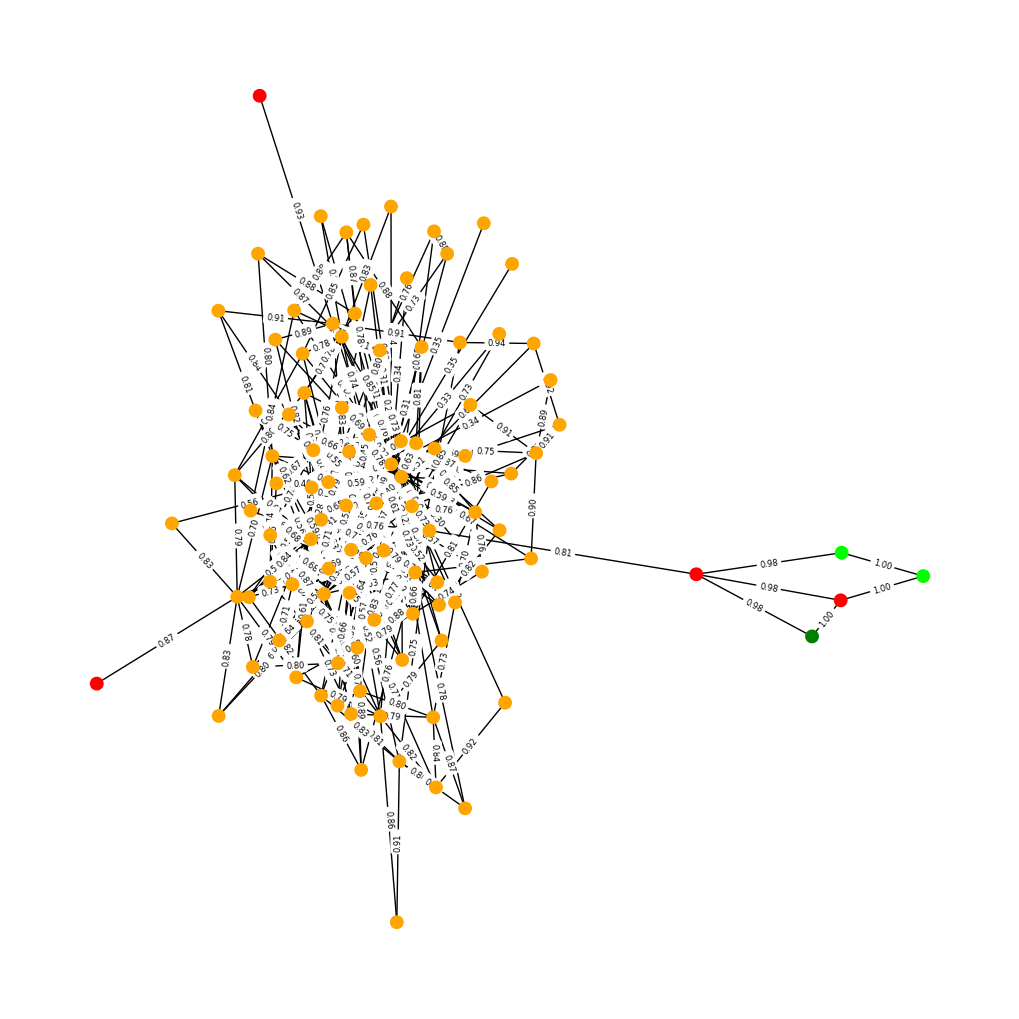

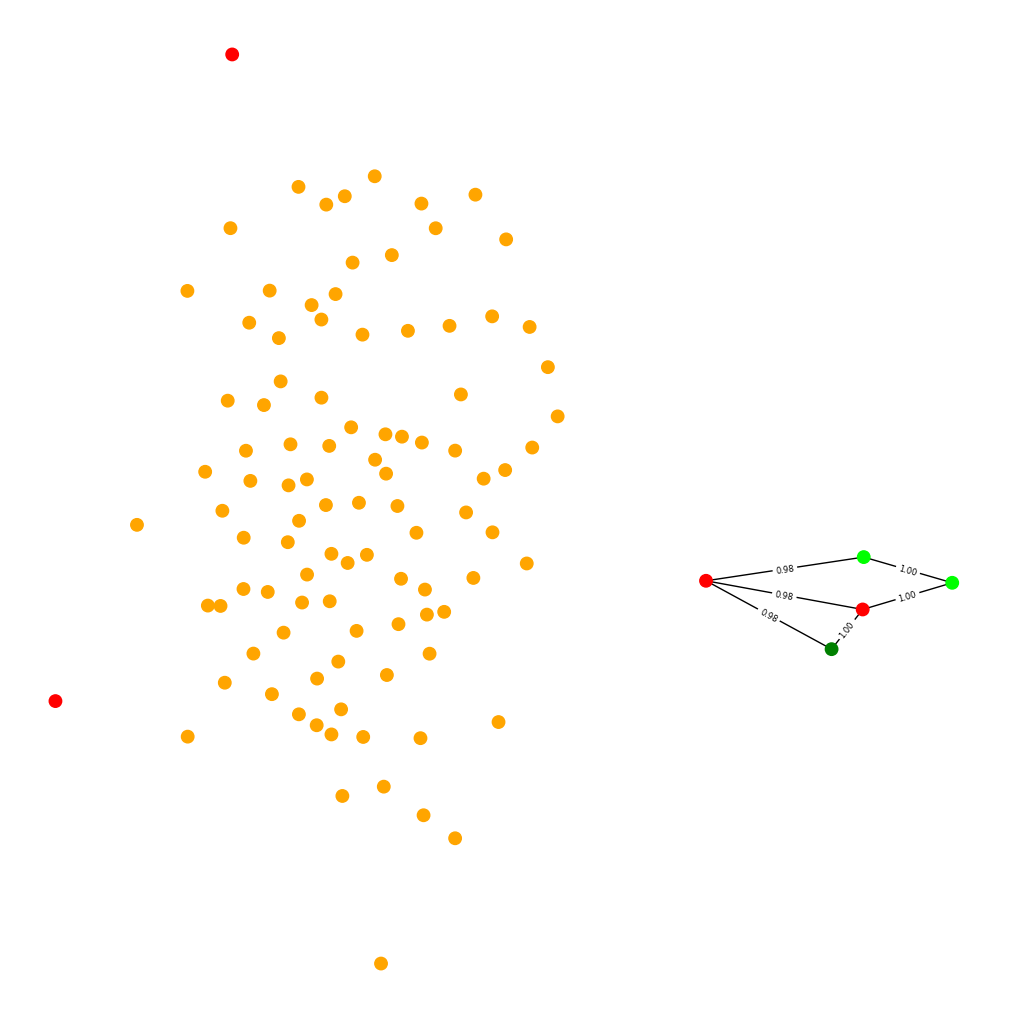

In [24]:
k = 6

mlp.eval()
downstreamTask.eval()

#AUCNode = [i for i in range(511,871,6)]
#AUCNode = [i for i in range(a[0].item(),a[len(a)-1]+1,6)]

#print(data.edge_index)

print(evaluation.evaluateNodeExplainerAUC(mlp, downstreamTask, data, data.edge_index, currentAUC, data.gt, k=k))

subset, edge_index_hop, mapping, edge_mask = k_hop_subgraph(node_idx=currentAUC, num_hops=3, edge_index=data.edge_index, relabel_nodes=True)

indexNodeToPred = (subset == currentAUC).nonzero().item()

G_hop = Data(x=data.x[subset], edge_index=edge_index_hop, y=data.y[subset])

pos = utils.plotGraphAll(G_hop)




w_ij = mlp.forward(downstreamTask, data.x[subset], edge_index_hop, indexNodeToPred)

# Min-Max Normalization. This works pretty well
weights_min = w_ij.min()
weights_max = w_ij.max()
weights_norm = (w_ij - weights_min) / (weights_max - weights_min)

#print(torch.unique(w_ij))
edge_ij = mlp.sampleGraph(w_ij, temperature)

## REMOVE IF SIGMOID WANTED
edge_ij = weights_norm


GraphSampled = Data(x=G_hop.x, edge_index=G_hop.edge_index, y=G_hop.y, edge_attr=edge_ij.detach())

pos = utils.plotGraphAll(GraphSampled, pos, edge_weights=True)


# Print topK edges
k = k * 2 if len(w_ij) >= k*2 else len(w_ij)
_, top_k_indices = torch.topk(edge_ij, k=k, largest=True)

mask = torch.zeros_like(edge_ij, dtype=torch.bool)
mask[top_k_indices] = True

sortedTopK, indices = torch.sort(top_k_indices)

edge_index_masked = G_hop.edge_index[:,mask]
weights_masked = edge_ij[sortedTopK]                # This is ordered by size

GtopK = Data(x=G_hop.x, edge_index=edge_index_masked, y=G_hop.y, edge_attr=weights_masked)

pos1 = utils.plotGraphAll(GtopK, pos=pos, color_map=None, edge_weights=True)